# ADM - HW2 Videogames Review

## Introduction
**Steam** is one of the most prominent digital distribution platforms, offering digital rights management and server hosting, combined with other services like video streaming and social networking. Steam's features include game installation, automatic updates, and various community elements, such as friends lists, groups, cloud storage, and in-game voice and chat functions.
Beyond just a store, Steam serves as a hub where gamers can connect and share their experiences, fostering a global gaming community.

The objective of this project is to analyze the vast pool of game reviews on Steam, where users (Authors) share their thoughts and feedback about various games. Each row in our dataset corresponds to a review, representing a unique interaction between a player and a game. By addressing key research questions (RQs), we aim to uncover meaningful patterns in the data that will help the company understand what players truly value in a video game. This analysis promises to provide valuable insights into player preferences and enhance the gaming experience.

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import itertools
import squarify
import seaborn as sns

## [RQ1] *Exploratory Data Analysis (EDA)*

Before diving deep into our dataset, it is crucial to understand its structure and main features. In our Exploratory Data Analysis (EDA), we will begin by loading the dataset and using essential functions to understand its structure, including the types of columns and initial summary statistics. Since datasets often contain missing values, we will identify any gaps and determine appropriate strategies to handle them, like filling missing values or excluding affected rows/columns.

Next, we will examine the distribution of each variable to better understand its characteristics. This will be complemented by data visualizations to provide deeper insights. We will also explore relationships between variables to uncover potential patterns or correlations. Finally, if necessary, we may apply feature engineering techniques to create new variables that can improve our analysis and subsequent modeling efforts.

Our dataset contains over 21 million rows, which makes it challenging to load fully due to memory constraints. To address this, we will begin by loading the first 1 million rows. This will allow us to explore the columns, check their types, and gather basic information before working with the entire dataset more efficiently.

#### Loading 1 million rows

In [2]:
df_1 = pd.read_csv("steam_reviews.csv", sep=",", header='infer', nrows=1000000, index_col=0)
df_1.shape

(1000000, 22)

After loading the first 1 million rows, we found that some columns, like **review** and **author.playtime_at_review** already contain missing values. Additionally, columns such as **timestamp_created**, **timestamp_updated**, and **author.last_played** are currently represented as integers but should be converted to datetime format to be useful in our analysis. We will then proceed with these conversions to ensure the data is correctly structured for further exploration.

In [56]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 1000000
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   app_id                          1000000 non-null  int64  
 1   app_name                        1000000 non-null  object 
 2   review_id                       1000000 non-null  int64  
 3   language                        1000000 non-null  object 
 4   review                          998242 non-null   object 
 5   timestamp_created               1000000 non-null  int64  
 6   timestamp_updated               1000000 non-null  int64  
 7   recommended                     1000000 non-null  bool   
 8   votes_helpful                   1000000 non-null  int64  
 9   votes_funny                     1000000 non-null  int64  
 10  weighted_vote_score             1000000 non-null  float64
 11  comment_count                   1000000 non-null  int64  
 12  steam

In [ ]:
# Display firt rows
df_1.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of any collection",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [ ]:
# Display columns
df_1.columns

['app_id',
 'app_name',
 'review_id',
 'language',
 'review',
 'timestamp_created',
 'timestamp_updated',
 'recommended',
 'votes_helpful',
 'votes_funny',
 'weighted_vote_score',
 'comment_count',
 'steam_purchase',
 'received_for_free',
 'written_during_early_access',
 'author.steamid',
 'author.num_games_owned',
 'author.num_reviews',
 'author.playtime_forever',
 'author.playtime_last_two_weeks',
 'author.playtime_at_review',
 'author.last_played']

#### Chunks

To address the challenge of loading the entire dataset, we decided to proceed by loading it in chunks and selecting only the necessary columns for our analysis. This approach allows us to efficiently work with the entire dataset without exceeding memory limitations.

In [2]:
# Name of the CSV file to be loaded in chunks
filename = 'steam_reviews.csv'

# Set the size of each chunk 
chunksize = 10 ** 6

Now that we are loading the data in chunks, we can effectively analyze missing values. For each chunk, we identify columns with missing values and count how many are missing. These counts are then updated in our cumulative dictionary, allowing us to keep a running total of missing values for each column throughout the entire dataset.

In [3]:
# Initialize an empty dictionary to store cumulative missing value counts
missing_values_cumulative = {}

# Iterate over chunks
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', index_col=0):
    
    # Identify columns with missing values
    col = chunk.columns[chunk.isnull().any()]
    
    # Count the number of missing values in each of those columns
    missing_values_count = chunk[col].isnull().sum()
    
    # Update the cumulative dictionary with missing value counts from each chunk
    for column, count in missing_values_count.items():
        if column in missing_values_cumulative:
            missing_values_cumulative[column] += count  # Add to the existing count
        else:
            missing_values_cumulative[column] = count  # Initialize the count for this column

# Print the final cumulative dictionary of missing values
print(missing_values_cumulative)

{'review': 33748, 'author.playtime_at_review': 25682, 'author.playtime_forever': 2, 'author.playtime_last_two_weeks': 2, 'author.last_played': 2}


With the cumulative dictionary of missing values, we discovered that there are over 33,000 missing values in the 'review' column and others. To address this, we will then decide how to handle these entries by assessing, for example, whether the entire review is missing or if we have basic information but lack only the review text. This will help us determine the best approach, such as using a placeholder value indicating "no review" when other relevant data is still available.

Next, we will proceed to load the data in chunks and divide the entire dataset into four distinct datasets, each focusing on key columns. At the moment the only column we are not considering is the **app_name**, beacuse **app_id** will be enough for our EDA. The datasets are structured as follows:

1. **Reviews Dataset**: Contains **'review_id**' and **'review**'.
2. **App Review Metadata Dataset**: Contains **'app_id**', **'review_id**', **'author.steamid**', **'language**', **'steam_purchase**', **'received_for_free**', **'timestamp_created**', and **'timestamp_updated**'.
3. **App Review Feedback Dataset**: Contains **'app_id**', **'review_id**', **'author.steamid**', **'recommended**', **'votes_helpful**', **'votes_funny**', **'weighted_vote_score**', **'comment_count**', and **'written_during_early_access**'.
4. **Author Details Dataset**: Contains **'app_id**', **'review_id**', **'author.steamid**', **'author.num_games_owned**', **'author.num_reviews**', **'author.playtime_forever**', **'author.playtime_last_two_weeks**', **'author.playtime_at_review**', and **'author.last_played**'.

This structured approach will facilitate efficient analysis while ensuring that we have the necessary context for each review.

### Reviews Dataset

This dataset will help us understanding:
- the total number of unique applications
- we will also create a list of **review_id** that contains null valuess in **review**, this will help us fo further analysis.

In [3]:
review_data = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=['app_id','review_id', 'review']):
    review_data.append(chunk)

reviews_df = pd.concat(review_data, ignore_index=True)

print(reviews_df.shape)
reviews_df.head()

(21747371, 3)


,app_id,review_id,review
0,292030,85185598,不玩此生遗憾，RPG游戏里的天花板，太吸引人了
1,292030,85185250,拔DIAO无情打桩机--杰洛特!!!
2,292030,85185111,巫师3NB
3,292030,85184605,"One of the best RPG's of all time, worthy of a..."
4,292030,85184287,大作


Understand the total number of unique applications.

In [4]:
print(f"There are {reviews_df['app_id'].nunique()} unique applications.")

There are 315 unique applications.


In [5]:
# Filter reviews_df to get rows where 'review' is null
null_reviews = reviews_df[reviews_df['review'].isnull()]

# Extract and print the 'review_id' values for rows with null 'review'
null_review_ids = null_reviews['review_id'].tolist()
print(len(null_review_ids))

33748


In [6]:
len(set(null_review_ids))

33576

We notice that there are duplicated rows with null values, since here we havent't removed duplicates, we use **set** to have a list of unique indexes with null reviews. This would not be a concern as we go on with our analysis beacuse we will always remove duplicates first.

In [7]:
null_rev_ids = list(set(null_review_ids))
print(len(null_rev_ids))


33576


In [13]:
del null_review_ids

In [14]:
del reviews_df

In [15]:
del null_reviews

### App Review Metadata Dataset

We begin by loading the **app_rev_meta_df** dataset, which contains metadata for the app reviews. In addition, we create a new column, **is_updated**, to track whether a review has been updated. This information could prove valuable for future analysis. The new column is created by simply comparing the **timestamp_created** and **timestamp_updated** fields: if they are equal, the review has not been updated; otherwise, it has. To enhance our analysis we change these 2 columns in datetime format.

In [17]:
use = ['app_id', 'review_id', 'author.steamid', 'language', 'steam_purchase', 'received_for_free', 'timestamp_created','timestamp_updated']
data = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=use):
    chunk['is_updated'] = np.where(chunk['timestamp_created'] != chunk['timestamp_updated'], True, False)
    data.append(chunk)

app_rev_meta_df = pd.concat(data, ignore_index=True)
app_rev_meta_df['timestamp_created'] = pd.to_datetime(app_rev_meta_df['timestamp_created'], unit='s')
app_rev_meta_df['timestamp_updated'] = pd.to_datetime(app_rev_meta_df['timestamp_updated'], unit='s')


print(app_rev_meta_df.shape)
app_rev_meta_df.head()

(21747371, 9)


,app_id,review_id,language,timestamp_created,timestamp_updated,steam_purchase,received_for_free,author.steamid,is_updated
0,292030,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,False,76561199095369542,False
1,292030,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,False,76561198949504115,False
2,292030,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,False,76561199090098988,False
3,292030,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,False,76561199054755373,False
4,292030,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,False,76561199028326951,False


In [ ]:
app_rev_meta_df.duplicated().sum() # Check for duplicated rows if there are

np.int64(134927)

In [18]:
app_rev_meta_df = app_rev_meta_df.drop_duplicates() # We remove them from the dataset
app_rev_meta_df.shape 

(21612444, 9)

The first variable we analyze is the **language** of the reviews. To gain a comprehensive understanding of this feature, we begin by examining the total number of unique languages in the dataset and the distribution of reviews across each language. Although there are over 28 languages present, the majority of the reviews are concentrated in English and Simplified Chinese (schinese). For the purpose of visualization, we consolidate languages with fewer reviews into a single category labeled 'Other'. This allows us to create a pie chart that highlights the relative proportions of the most commonly used languages while simplifying the representation of the less frequently used ones.

In [71]:
print(f"There are {app_rev_meta_df.language.nunique()} unique languages.")

There are 28 unique languages.


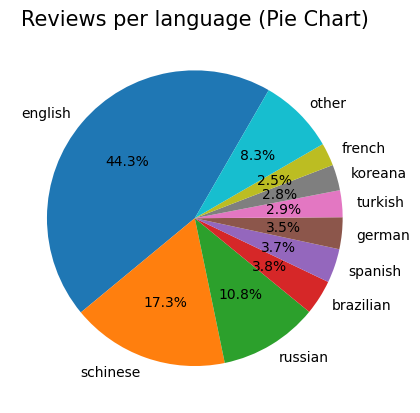

In [72]:
a = app_rev_meta_df.groupby('language').review_id.count().sort_values(ascending=False)
other = a[a.values <500000]
a = a[a.values>=500000]
a['other'] = other.values.sum()
plt.pie(a.values, labels = a.index, autopct='%.1f%%',startangle=60)
plt.title('Reviews per language (Pie Chart)', fontsize=15)
plt.show()

We start by extracting the **year** from the **timestamp_created** column and creating a new column called **year_created**. This enables us to analyze the number of reviews by year. Next, we group the data by both **year_created** and **is_updated**, which indicates whether a review has been updated. We count the number of reviews (**review_id**) for each year and each update status, and visualize the results using a **stacked bar plot**. This allows us to observe the distribution of both updated and non-updated reviews over time. The plot provides insights into trends in review activity across the years.

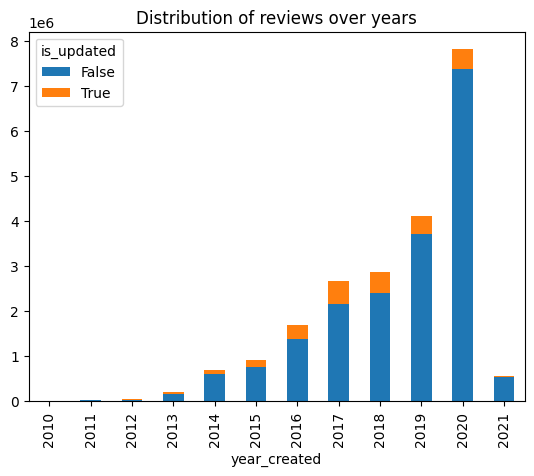

In [73]:
app_rev_meta_df['year_created']=app_rev_meta_df['timestamp_created'].dt.year
app_rev_meta_df.groupby(['year_created','is_updated']).review_id.count().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of reviews over years')
plt.show()

In [19]:
app_rev_meta_df.head()

,app_id,review_id,language,timestamp_created,timestamp_updated,steam_purchase,received_for_free,author.steamid,is_updated
0,292030,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,False,76561199095369542,False
1,292030,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,False,76561198949504115,False
2,292030,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,False,76561199090098988,False
3,292030,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,False,76561199054755373,False
4,292030,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,False,76561199028326951,False


Below, we present key statistics for **steam_purchase** and **received_for_free**, offering insights into their distributions and relationships within the dataset.

In [31]:
# Calculate counts for steam_purchase and received_for_free
steam_purchase_counts = app_rev_meta_df['steam_purchase'].value_counts()
received_for_free_counts = app_rev_meta_df['received_for_free'].value_counts()

# Create a summary DataFrame with counts
stats_df = pd.DataFrame({
    'steam_purchase_count': steam_purchase_counts,
    'received_for_free_count': received_for_free_counts
})

# Calculate the percentage for each column
stats_df['steam_purchase_percentage'] = ((stats_df['steam_purchase_count'] / stats_df['steam_purchase_count'].sum()) * 100).round(2)
stats_df['received_for_free_percentage'] = ((stats_df['received_for_free_count'] / stats_df['received_for_free_count'].sum()) * 100).round(2)

# Add a Total row
stats_df.loc['Total'] = stats_df.sum(numeric_only=True)
stats_df.loc['Total', 'steam_purchase_percentage'] = 100
stats_df.loc['Total', 'received_for_free_percentage'] = 100

# Display the summary table
stats_df



,steam_purchase_count,received_for_free_count,steam_purchase_percentage,received_for_free_percentage
False,4887935.0,20926390.0,22.62,96.83
True,16724509.0,686054.0,77.38,3.17
Total,21612444.0,21612444.0,100.00,100.00


We delete **app_rev_meta_df** to free up memory.

In [32]:
del app_rev_meta_df

### App Review Feedback Dataset

We begin by loading the **rev_fb_df** dataset, which contains feedback for the app reviews. The exploratory data analysis will uncover insights related to user recommendations, helpfulness and funniness of votes, the weighted vote score, comment counts, and reviews written during early access, helping us understand user engagement and sentiment towards the app.

In [33]:
use = ['app_id', 'review_id', 'author.steamid','recommended','votes_helpful','votes_funny',
       'weighted_vote_score','comment_count','written_during_early_access']
data = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=use):
    data.append(chunk)

rev_fb_df = pd.concat(data, ignore_index=True)

print(rev_fb_df.shape)
rev_fb_df.head()

(21747371, 9)


,app_id,review_id,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,written_during_early_access,author.steamid
0,292030,85185598,True,0,0,0.0,0,False,76561199095369542
1,292030,85185250,True,0,0,0.0,0,False,76561198949504115
2,292030,85185111,True,0,0,0.0,0,False,76561199090098988
3,292030,85184605,True,0,0,0.0,0,False,76561199054755373
4,292030,85184287,True,0,0,0.0,0,False,76561199028326951


In [73]:
rev_fb_df.duplicated().sum()

np.int64(134927)

In [ ]:
rev_fb_df = rev_fb_df.drop_duplicates()  # Remove duplicates
rev_fb_df.shape

#### Summary of Review Data

The analysis of votes helpful reveals significant variability, with a high standard deviation indicating that while many reviews have few or no helpful votes, a small number received exceptionally high counts. Notably, 75% of reviews received at most one helpful vote, suggesting some level of engagement. However, the maximum value appears unusually high, pointing to potential data errors or outliers.

For votes funny, a similar trend is observed, with a high standard deviation reflecting wide variation in the number of funny votes. Many reviews received no funny votes at all, and 75% reported zero engagement, indicating that a large portion did not resonate humorously with users. Again, the maximum value raises concerns about potential anomalies in the dataset.

Regarding the weighted vote score, the average is low, indicating that perceived helpfulness is not consistently high across reviews. The median score is zero, and 75% of reviews have scores below 0.48.

Overall, a significant portion of reviews receives minimal votes for helpfulness or humor. The high maximum values for votes helpful and funny raise concerns about data accuracy, while the low weighted vote scores indicate inconsistent perceived helpfulness, suggesting a need for further investigation into the factors influencing these scores.


In [6]:
# Set the float display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Now, when you call describe(), it will display the results in the specified format
description = rev_fb_df.describe()
print(description)
# Reset the float format back to default if needed
pd.reset_option('display.float_format')

           app_id   review_id    votes_helpful   votes_funny  \
count 21747371.00 21747371.00      21747371.00   21747371.00   
mean    392818.08 51874995.36        404468.86     126791.73   
std     248097.74 20842672.75    1333740761.03   23335525.91   
min         70.00       43.00             0.00          0.00   
25%     242760.00 36393551.50             0.00          0.00   
50%     359550.00 53840585.00             0.00          0.00   
75%     578080.00 69287931.50             1.00          0.00   
max    1291340.00 85218673.00 4398046511106.00 4294967295.00   

       weighted_vote_score  comment_count       author.steamid  
count          21747371.00    21747371.00          21747371.00  
mean                  0.17           0.13 76561198300873216.00  
std                   0.24           2.20         317913387.02  
min                   0.00           0.00 76561197960265728.00  
25%                   0.00           0.00 76561198071333584.00  
50%                   0.00       

To analyze the relationship between user recommendations and reviews written during early access, we group the data by the **recommended** and **written_during_early_access** columns, counting the number of **review_id** entries. The results are then visualized using a stacked bar chart, providing a clear view of user sentiments over time.

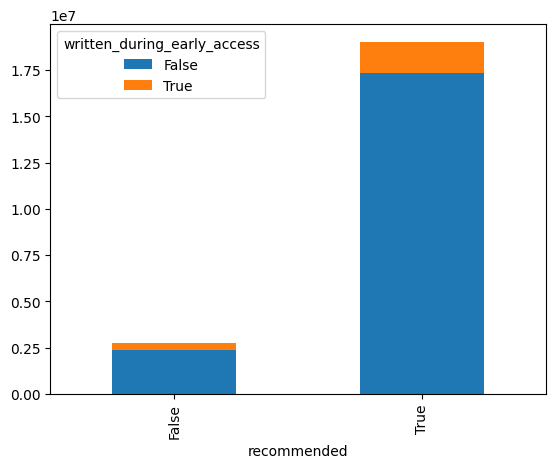

In [101]:
rec_wri = rev_fb_df.groupby(['recommended','written_during_early_access']).review_id.count().unstack()
rec_wri.plot(kind='bar',stacked=True)
plt.show()

We start by selecting a portion of the dataset with all the reviews that have at least 1 helpful vote or funny vote or comment, and also selecting values less than 1 million which is what came out from our summary description. We can notice that is approx. 1/3 of the entire dataset.

In [91]:
rev_nozero = rev_fb_df.loc[(rev_fb_df['votes_helpful']>0)|(rev_fb_df['votes_funny']>0)|(rev_fb_df['comment_count']>0)]
rev_nozero = rev_nozero.loc[(rev_nozero['votes_helpful']<1e6)&(rev_nozero['votes_funny']<1e6)]
rev_nozero.shape

(7382264, 9)

##### **'votes_helpful'**

In [93]:
print(f"{round((len(rev_fb_df) - len(rev_fb_df[rev_fb_df['votes_helpful']>0]) )    /  len(rev_fb_df)  * 100,2)}% of the reviews has 0 helpful votes.")
# So we look at a filtered dataset with votes_helpful > 0
filt_rev = rev_fb_df[rev_fb_df['votes_helpful']>0]
print(f"99.9% of the reviews with at least 1 helpful vote in our dataset have {round(filt_rev['votes_helpful'].quantile(0.999),2)} or fewer helpful votes. \nIn other words, only 0.01% of the reviews with at least 1 helpful vote received more than {round(filt_rev['votes_helpful'].quantile(0.999),2)} helpful votes.")

71.93% of the reviews has 0 helpful votes.
99.9% of the reviews with at least 1 helpful vote in our dataset have 642.76 or fewer helpful votes. 
In other words, only 0.01% of the reviews with at least 1 helpful vote received more than 642.76 helpful votes.


Here we understand that there are two real outliers that should be removed when plotting.

In [91]:
filt_rev['votes_helpful'].sort_values(ascending=False)[:5]

10751984    4398046511106
10449392    4398046511104
5806427             29608
7824298             28211
20261550            26149
Name: votes_helpful, dtype: int64

To analyze the distribution of 'votes_helpful', we first exclude extreme outliers by limiting the maximum count to 30,000. 
Then we split reviews in 2 categories based on the 99.9th percentile.
- **Below or equal to the 99.9th percentile** (`filt_rev_bel`)
- **Above the 99.9th percentile** (`filt_rev_abov`)

We visualize the distribution of the 'votes_helpful' for the reviews below the threshold using a histogram. To better reveal patterns, especially for reviews with fewer votes, we apply a logarithmic scale to the x-axis. This method allows us to focus on the general distribution while isolating outliers for further analysis.

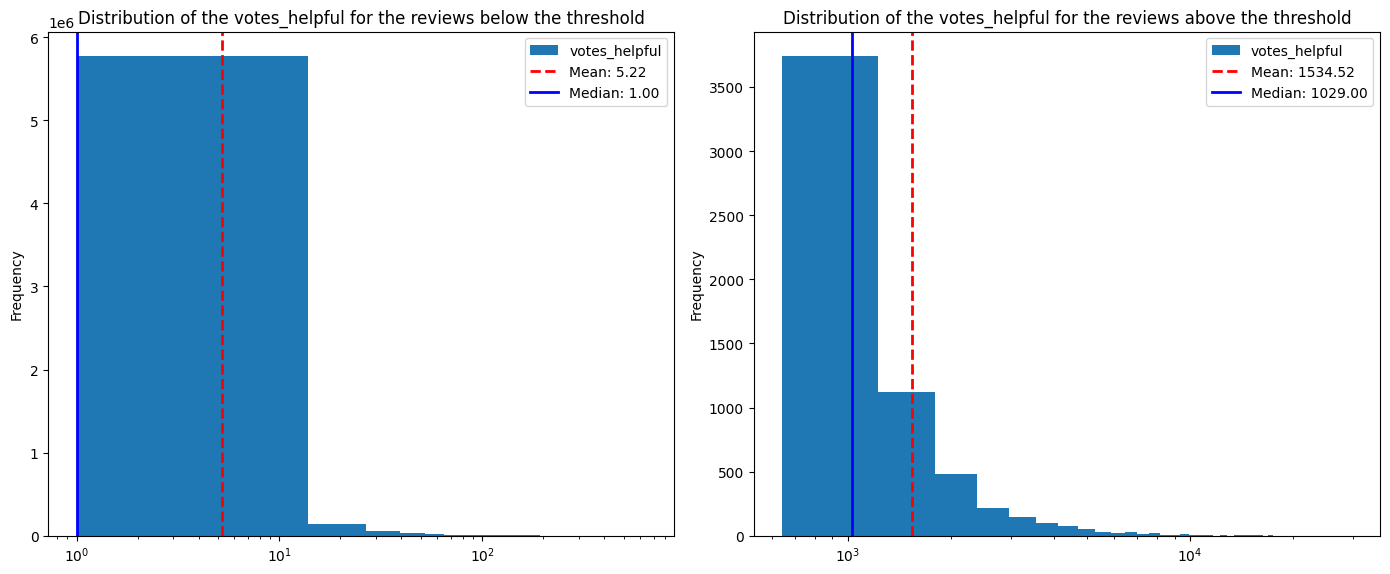

In [101]:
filt_rev = filt_rev[filt_rev['votes_helpful']<30000]
filt_rev_bel = filt_rev[filt_rev['votes_helpful']<=642.76]
filt_rev_abov = filt_rev[filt_rev['votes_helpful']>642.76]
mean_value_b = filt_rev_bel['votes_helpful'].mean()
mean_value_a = filt_rev_abov['votes_helpful'].mean()
median_value_b = filt_rev_bel['votes_helpful'].median()
median_value_a = filt_rev_abov['votes_helpful'].median()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

filt_rev_bel['votes_helpful'].plot(kind='hist',bins=50,ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Distribution of the votes_helpful for the reviews below the threshold')

filt_rev_abov['votes_helpful'].plot(kind='hist',bins=50, ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Distribution of the votes_helpful for the reviews above the threshold')
axes[1].legend()
plt.tight_layout()
plt.show()

##### **'votes_funny'**

In [103]:
print(f"{round((len(rev_fb_df) - len(rev_fb_df[rev_fb_df['votes_funny']>0]) )    /  len(rev_fb_df)  * 100,2)}% of the reviews has 0 funny votes.")
# So we filter the dataset to pick only reviews with at least 1 funny vote
filt_rev_2 = rev_fb_df[rev_fb_df['votes_funny']>0]
print(f"99.9% of the reviews with at least 1 funny vote in our dataset have {filt_rev_2['votes_funny'].quantile(0.999)} or fewer helpful votes. \nIn other words, only 0.01% of the reviews with at least 1 funny vote received more than {filt_rev_2['votes_funny'].quantile(0.999)} helpful votes.")

88.03% of the reviews has 0 funny votes.
99.9% of the reviews with at least 1 funny vote in our dataset have 946.0 or fewer helpful votes. 
In other words, only 0.01% of the reviews with at least 1 funny vote received more than 946.0 helpful votes.


After filtering out reviews with 0 'funny' votes, the summary statistics reveal:

- **Concentration at Low Values**: Despite filtering, the majority of reviews still have very few 'funny' votes, with the 25th, 50th (median), and 75th percentiles all at or below 2.
- **High Mean Due to Outliers**: The mean of 1,059,281.76 is skewed by a few reviews with exceptionally high votes, as shown by the maximum value (4,294,967,295).
- **Large Spread**: The high standard deviation (67,442,056.63) indicates a very wide range, emphasizing the impact of outliers.
- **Right-Skewed Distribution**: With most votes clustered at low counts and a few extreme values, the distribution is highly right-skewed.

Overall, this distribution shows a strong concentration of low values with a few extreme outliers.

In [155]:
pd.options.display.float_format = '{:.2f}'.format
filt_rev_2['votes_funny'].describe()

count      2603072.00
mean       1059281.76
std       67442056.63
min              1.00
25%              1.00
50%              1.00
75%              2.00
max     4294967295.00
Name: votes_funny, dtype: float64

Upon sorting the `votes_funny` column, we found multiple reviews with the maximum value of 4,294,967,295, indicating extreme outliers. It’s highly unusual for multiple reviews to have identical maximum values, suggesting possible data entry errors or anomalies. These outliers may distort analysis, removing or separately analyzing them could help improve the accuracy of our insights.

In [151]:
rev_fb_df['votes_funny'].sort_values(ascending=False)[:5]

2081536     4294967295
18916307    4294967295
1466707     4294967295
17248723    4294967295
2081999     4294967295
Name: votes_funny, dtype: int64

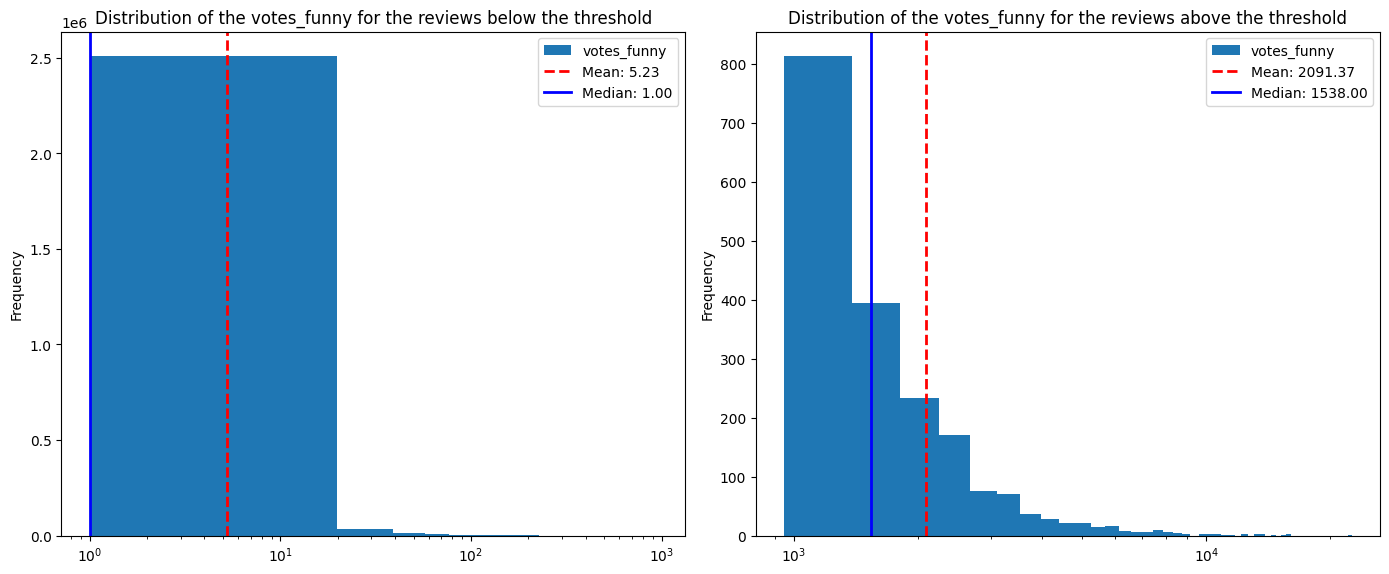

In [106]:
filt_rev_2 = filt_rev_2[filt_rev_2['votes_funny']<1e6]
filt_rev_2_bel = filt_rev_2[filt_rev_2['votes_funny']<=946]
filt_rev_2_abov = filt_rev_2[filt_rev_2['votes_funny']>946]

mean_value_b = filt_rev_2_bel['votes_funny'].mean()
mean_value_a = filt_rev_2_abov['votes_funny'].mean()
median_value_b = filt_rev_2_bel['votes_funny'].median()
median_value_a = filt_rev_2_abov['votes_funny'].median()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

filt_rev_2_bel['votes_funny'].plot(kind='hist',bins=50,ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Distribution of the votes_funny for the reviews below the threshold')

filt_rev_2_abov['votes_funny'].plot(kind='hist',bins=50, ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Distribution of the votes_funny for the reviews above the threshold')
axes[1].legend()
plt.tight_layout()
plt.show()


##### '**weighted_vote_score**'

After removing extreme outliers in `votes_helpful` and `votes_funny`, the distribution of `weighted_vote_score` is highly skewed, with most values concentrated near zero. A smaller cluster of reviews shows moderately high scores. Next, we could focus on exploring the secondary cluster and conducting segmentation analysis to better understand engagement patterns.

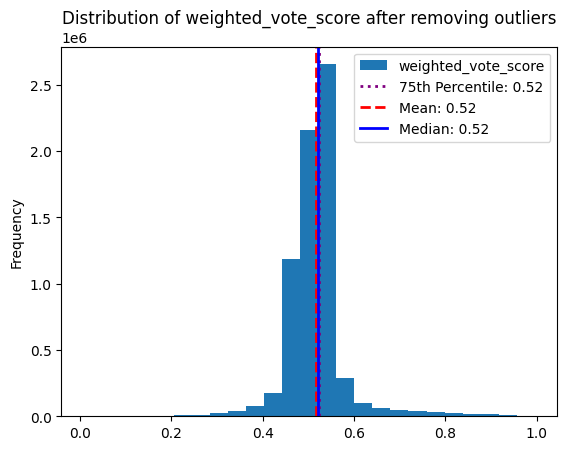

In [109]:
weigh = rev_fb_df[rev_fb_df['votes_helpful']<30000]
weigh = weigh[weigh['votes_funny']<1e6]
weigh = weigh[weigh['weighted_vote_score']>0]
mean_value = weigh['weighted_vote_score'].mean()
median_value = weigh['weighted_vote_score'].median()
p75 = weigh['weighted_vote_score'].quantile(0.75)
weigh['weighted_vote_score'].plot(kind='hist',bins=25)
# Add vertical lines for percentiles
plt.axvline(p75, color='purple', linestyle='dotted', linewidth=2, label=f'75th Percentile: {p75:.2f}')
#plt.xscale('log')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value:.2f}')
plt.title('Distribution of weighted_vote_score after removing outliers')
plt.legend()
plt.show()

##### **'comment_count'**

Here we find a particular review with an extreme number of comments, can be useful later in the analysis, so we check for its review id.

In [63]:
rev_fb_df['comment_count'].sort_values(ascending=False)[:5]

20444210    4893
16913851    1432
14916749    1235
20261550    1143
17308491    1034
Name: comment_count, dtype: int64

In [64]:
rev_fb_df[rev_fb_df['comment_count']==4893]

,app_id,review_id,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,written_during_early_access,author.steamid
20444210,304390,29914880,True,3454,299,0.965419,4893,False,76561198094505831


We select this number as threshold to divide the reviews according to the number of comments.

In [69]:
c = rev_fb_df[rev_fb_df['comment_count']<4000]
c = c[c['comment_count']>0]
c['comment_count'].quantile(0.999)

np.float64(97.0)

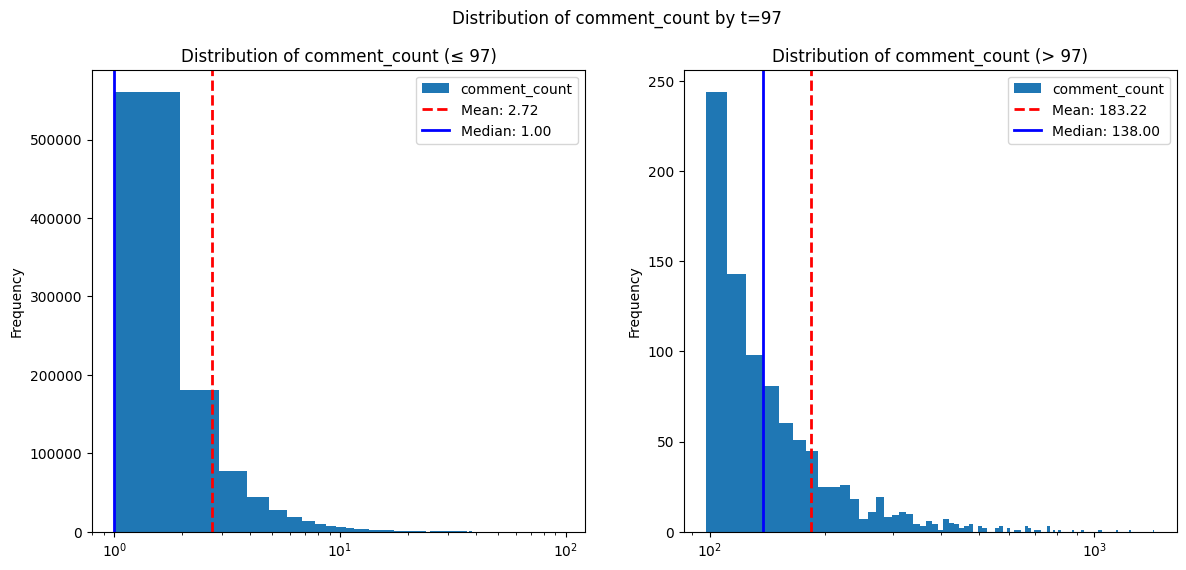

In [72]:
c_b = c[c['comment_count'] <= 97]
c_a = c[c['comment_count'] > 97]

mean_value_b = c_b['comment_count'].mean()
mean_value_a = c_a['comment_count'].mean()
median_value_b = c_b['comment_count'].median()
median_value_a = c_a['comment_count'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

c_b['comment_count'].plot(kind='hist', bins=100, ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].set_title('Distribution of comment_count (≤ 97)')
axes[0].legend()

c_a['comment_count'].plot(kind='hist', bins=100, ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Distribution of comment_count (> 97)')
axes[1].legend()

plt.suptitle('Distribution of comment_count by t=97')
plt.show()


##### **Correlation**

Here we create two side-by-side heatmaps to visualize the correlation between `votes_helpful`, `votes_funny`, `weighted_vote_score`, and `comment_count`.
- The first heatmap displays the correlation matrix for all data (excluding outliers).
- The second heatmap focuses on rows where both `votes_helpful` and `votes_funny` are greater than zero, highlighting correlations in non-zero votes.

The results suggest that excluding zero votes doesn’t drastically change the relationships but slightly strengthens the correlations.

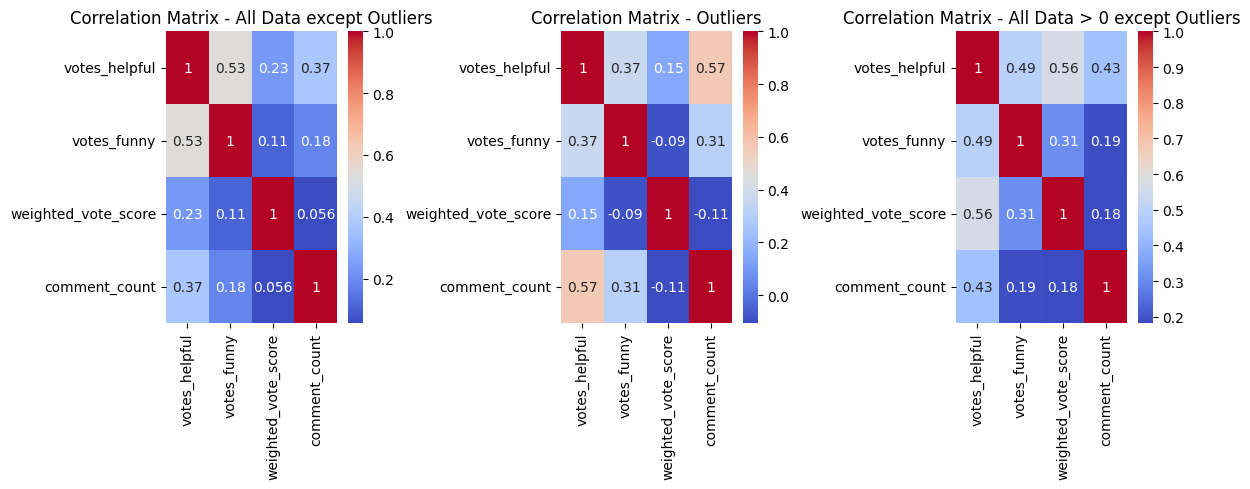

In [134]:
rev_nozero_bel = rev_nozero.loc[(rev_nozero['votes_helpful']<=642.76)&(rev_nozero['votes_funny']<=946)&(rev_nozero['comment_count']<4000)]
rev_nozero_bel_pos = rev_nozero_bel.loc[(rev_nozero_bel['votes_helpful']>0)&(rev_nozero_bel['votes_funny']>0)&(rev_nozero_bel['comment_count']>0)]
rev_nozero_abov = rev_nozero.loc[(rev_nozero['votes_helpful']>642.76)&(rev_nozero['votes_funny']>946)]

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1) 
corr_matrix = rev_nozero_bel[['votes_helpful', 'votes_funny','weighted_vote_score','comment_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - All Data except Outliers')
plt.subplot(1, 3, 2)
corr_matrix_2 = rev_nozero_abov[['votes_helpful', 'votes_funny','weighted_vote_score','comment_count']].corr()
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Outliers')
plt.subplot(1, 3, 3) 
corr_matrix_3 = rev_nozero_bel_pos[['votes_helpful', 'votes_funny','weighted_vote_score','comment_count']].corr()
sns.heatmap(corr_matrix_3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - All Data > 0 except Outliers')

plt.tight_layout() 
plt.show()



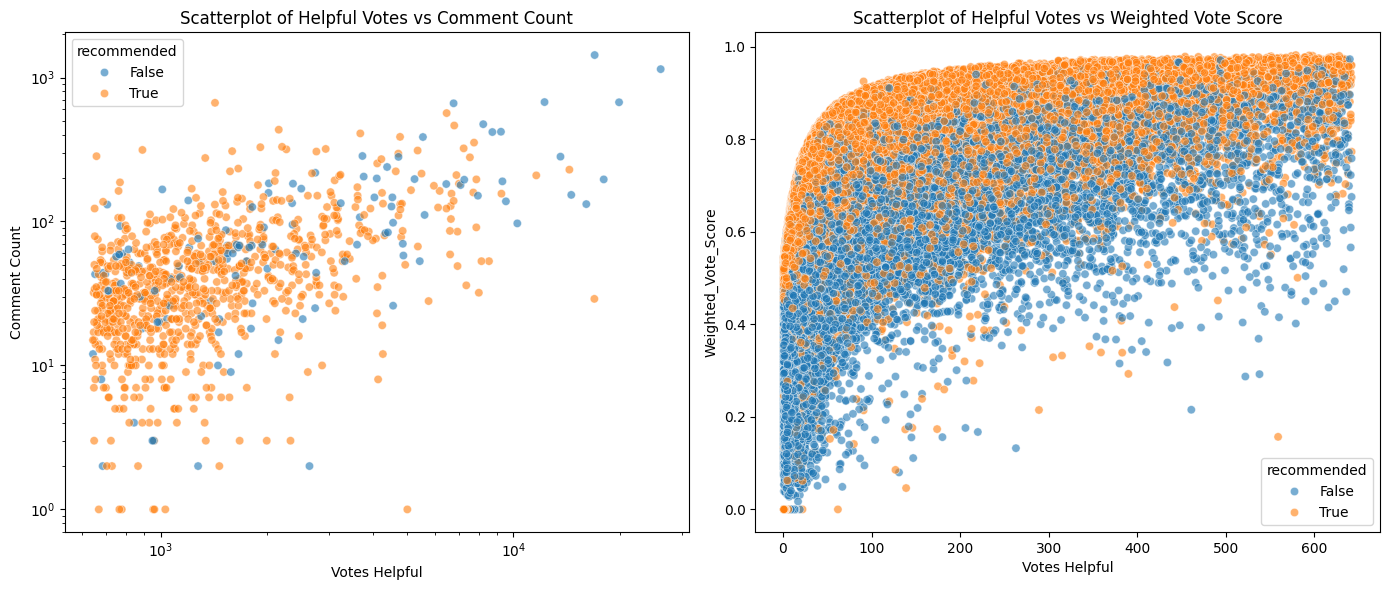

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=rev_nozero_abov, x='votes_helpful', y='comment_count', alpha=0.6, hue='recommended',ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Scatterplot of Helpful Votes vs Comment Count')
axes[0].set_xlabel('Votes Helpful')
axes[0].set_ylabel('Comment Count')

sns.scatterplot(data=rev_nozero_bel_pos, x='votes_helpful', y='weighted_vote_score', alpha=0.6, hue='recommended',ax=axes[1])
#axes[1].set_xscale('log')
#axes[1].set_yscale('log')
axes[1].set_title('Scatterplot of Helpful Votes vs Weighted Vote Score')
axes[1].set_xlabel('Votes Helpful')
axes[1].set_ylabel('Weighted_Vote_Score')

plt.tight_layout()
plt.show()

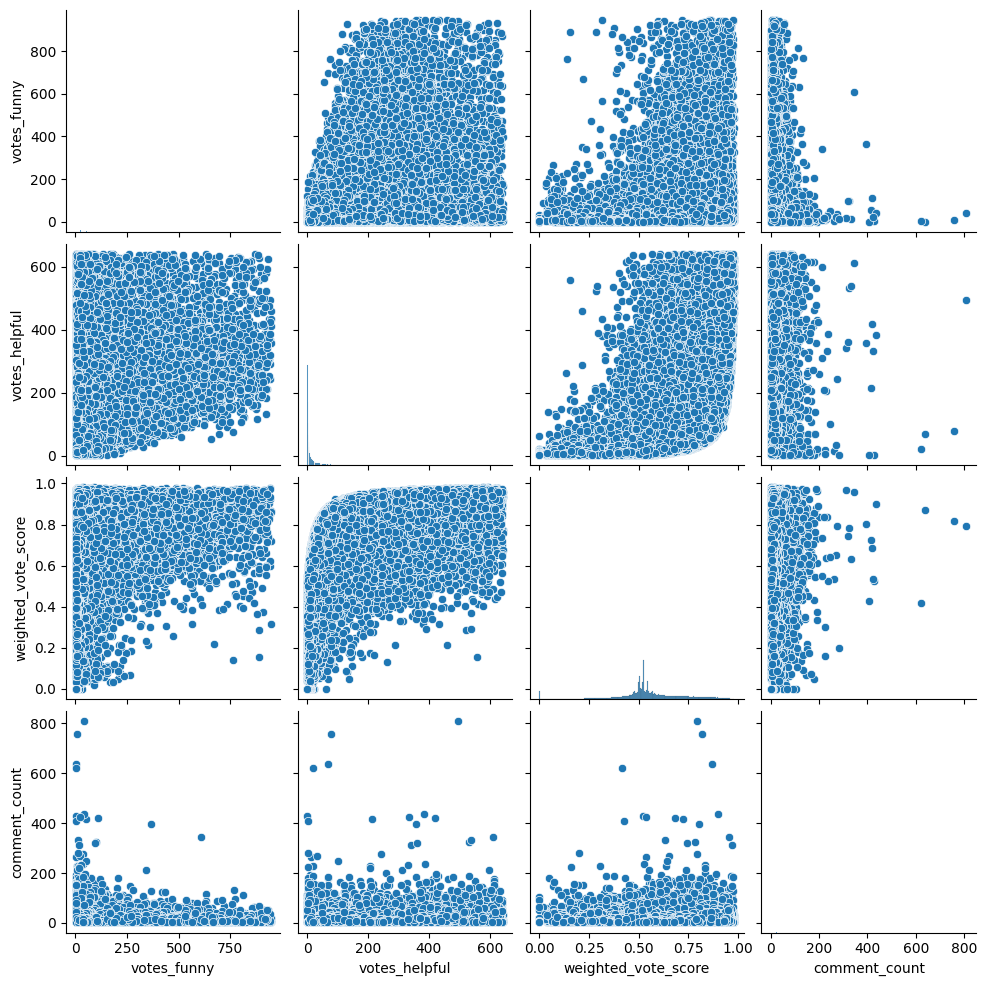

In [143]:
# Pair plot of review metrics
import seaborn as sns
sns.pairplot(rev_nozero_bel_pos[['votes_funny', 'votes_helpful', 'weighted_vote_score', 'comment_count']])
plt.show()

We delete **rev_fb_df** to free up memory.

In [ ]:
del rev_fb_df

### Author Details Dataset

We begin by loading the **aut_det_df** dataset, which provides insights into user interactions with the app. The EDA on this dataset will focus on key metrics, such as the total number of games owned, total reviews submitted, and playtime statistics, allowing us to analyze user engagement and activity levels effectively. We will also examine the last played date to understand the recency of user activity and its impact on the app's reviews.

In [7]:
use = ['app_id', 'review_id', 'author.steamid','author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 
       'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']
data = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=use):
    #clean_chunk = chunk.fillna(value='No review')
    data.append(chunk)

aut_det_df = pd.concat(data, ignore_index=True)
aut_det_df['author.last_played'] = pd.to_datetime(aut_det_df['author.last_played'], unit='s', errors='coerce')
print(aut_det_df.shape)
aut_det_df.head()

(21747371, 9)


,app_id,review_id,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,85185598,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,85185250,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,85185111,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,85184605,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,85184287,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [8]:
aut_det_df = aut_det_df.drop_duplicates()
aut_det_df.shape

(21612444, 9)

In [145]:
aut_det_df.isnull().sum()

app_id                                0
review_id                             0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

In [146]:
# Set the float display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Now, when you call describe(), it will display the results in the specified format
description = aut_det_df.drop(columns=['app_id','review_id','author.steamid']).describe()
print(description)
# Reset the float format back to default if needed
pd.reset_option('display.float_format')

       author.num_games_owned  author.num_reviews  author.playtime_forever  \
count             21747371.00         21747371.00              21747369.00   
mean               1011300.10           404477.48                 16091.05   
min                      0.00                1.00                     0.00   
25%                     22.00                2.00                  1250.00   
50%                     61.00                4.00                  4307.00   
75%                    145.00               10.00                 14912.00   
max          4398046511619.00    4398046511108.00               3744943.00   
std             2108829161.10       1333740761.02                 37430.57   

       author.playtime_last_two_weeks  author.playtime_at_review  \
count                     21747369.00                21721689.00   
mean                           155.54                    8807.42   
min                              0.00                       1.00   
25%                      

##### author.num_games_owned

Also here we find outliers that impact distributions.

In [7]:
print(aut_det_df['author.num_games_owned'].sort_values(ascending=False)[:8])

5502449     4398046511619
21079021    4398046511316
3507697     4398046511179
8680945     4398046511170
6913009     4398046511151
5790335             24258
5242234             24184
4418318             24172
Name: author.num_games_owned, dtype: int64


In [4]:
aut_filt=aut_det_df[aut_det_df['author.num_games_owned']<1e6]
print(aut_filt['author.num_games_owned'].quantile(0.99))

1102.0


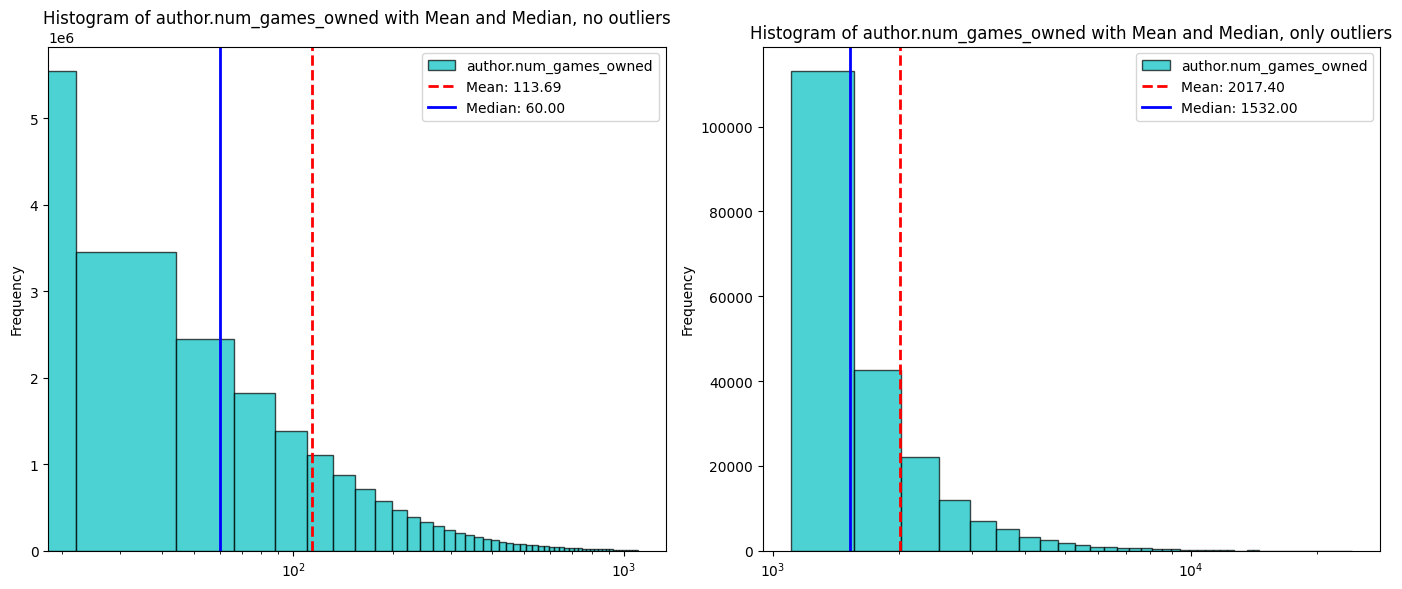

In [8]:
aut_filt_bel = aut_filt[aut_filt['author.num_games_owned']<=1102]
aut_filt_abov = aut_filt[aut_filt['author.num_games_owned']>1102]

mean_value_b = aut_filt_bel['author.num_games_owned'].mean()
mean_value_a = aut_filt_abov['author.num_games_owned'].mean()
median_value_b = aut_filt_bel['author.num_games_owned'].median()
median_value_a = aut_filt_abov['author.num_games_owned'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.num_games_owned'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.num_games_owned with Mean and Median, no outliers')

aut_filt_abov['author.num_games_owned'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.num_games_owned with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()


##### author.num_reviews

In [9]:
print(aut_det_df['author.num_reviews'].sort_values(ascending=False)[:5])

13093694    4398046511108
5663041     4398046511105
20271637             5236
20757736             5236
8853250              5236
Name: author.num_reviews, dtype: int64


In [10]:
aut_filt=aut_det_df[aut_det_df['author.num_reviews']<1e6]
print(aut_filt['author.num_reviews'].quantile(0.99))

100.0


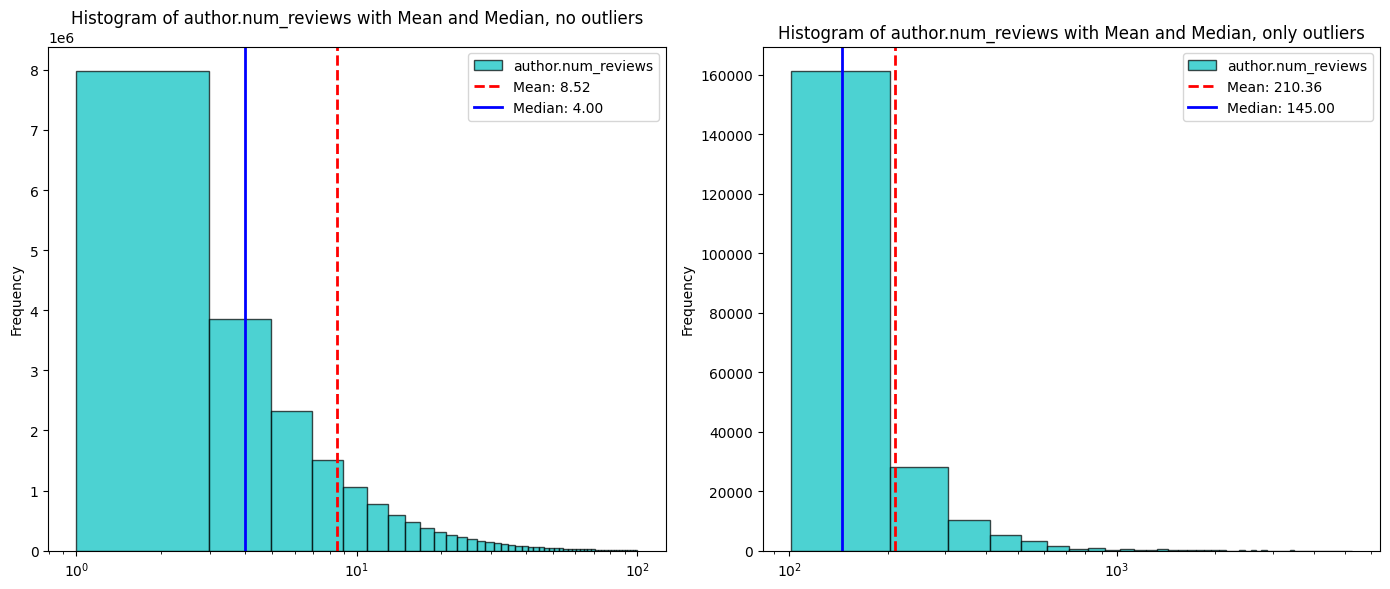

In [16]:
aut_filt_bel = aut_filt[aut_filt['author.num_reviews']<=100]
aut_filt_abov = aut_filt[aut_filt['author.num_reviews']>100]

mean_value_b = aut_filt_bel['author.num_reviews'].mean()
mean_value_a = aut_filt_abov['author.num_reviews'].mean()
median_value_b = aut_filt_bel['author.num_reviews'].median()
median_value_a = aut_filt_abov['author.num_reviews'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.num_reviews'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.num_reviews with Mean and Median, no outliers')

aut_filt_abov['author.num_reviews'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.num_reviews with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()


##### author.playtime_forever

These 2 rows has multiple null values, we can drop them in case we need to analyze those columns going on with the analysis.

In [32]:
aut_det_df[aut_det_df['author.playtime_forever'].isnull()]

,app_id,review_id,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
5859440,413150,85144520,76561198004770905,62,1,NaN,NaN,1280.0,NaT
5859504,413150,85132649,76561198219071705,50,2,NaN,NaN,7496.0,NaT


In [35]:
aut_det_df['author.playtime_forever'].quantile(0.75)
aut_det_df['author.playtime_forever'].value_counts()

author.playtime_forever
7.0         7440
6.0         7420
10.0        7311
8.0         7251
12.0        7165
            ... 
204029.0       1
204883.0       1
201431.0       1
219746.0       1
346327.0       1
Name: count, Length: 297891, dtype: int64

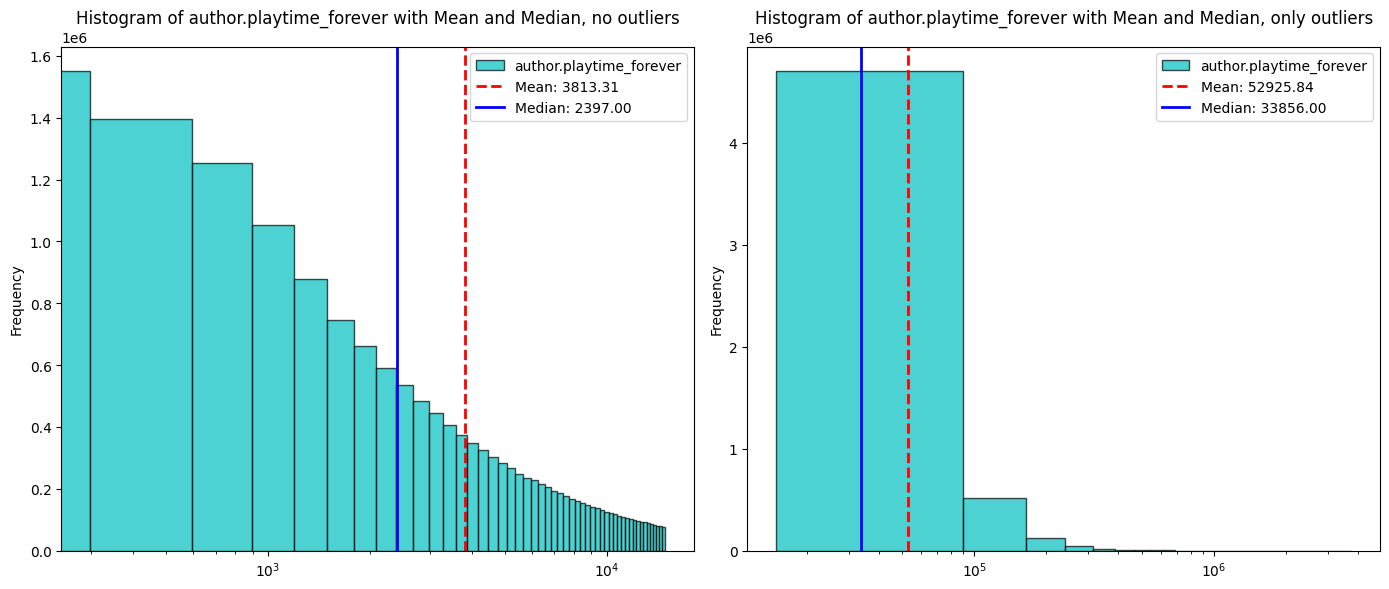

In [34]:
aut_filt_bel = aut_det_df[aut_det_df['author.playtime_forever']<=14912]
aut_filt_abov = aut_det_df[aut_det_df['author.playtime_forever']>14912]

mean_value_b = aut_filt_bel['author.playtime_forever'].mean()
mean_value_a = aut_filt_abov['author.playtime_forever'].mean()
median_value_b = aut_filt_bel['author.playtime_forever'].median()
median_value_a = aut_filt_abov['author.playtime_forever'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.playtime_forever'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.playtime_forever with Mean and Median, no outliers')

aut_filt_abov['author.playtime_forever'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.playtime_forever with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()

##### author.playtime_last_two_weeks

In [36]:
aut_det_df['author.playtime_last_two_weeks'].quantile(0.99)

np.float64(3358.0)

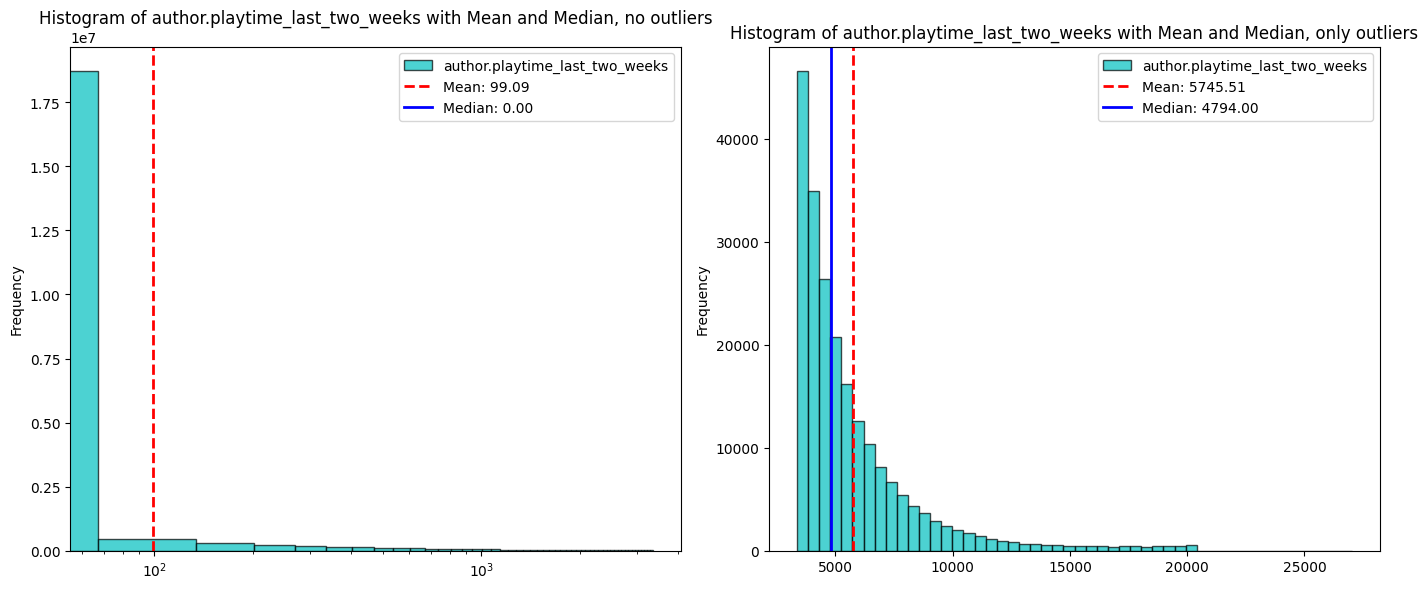

In [40]:
aut_filt_bel = aut_det_df[aut_det_df['author.playtime_last_two_weeks']<=3358]
aut_filt_abov = aut_det_df[aut_det_df['author.playtime_last_two_weeks']>3358]

mean_value_b = aut_filt_bel['author.playtime_last_two_weeks'].mean()
mean_value_a = aut_filt_abov['author.playtime_last_two_weeks'].mean()
median_value_b = aut_filt_bel['author.playtime_last_two_weeks'].median()
median_value_a = aut_filt_abov['author.playtime_last_two_weeks'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.playtime_last_two_weeks'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.playtime_last_two_weeks with Mean and Median, no outliers')

aut_filt_abov['author.playtime_last_two_weeks'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
#axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.playtime_last_two_weeks with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()

##### author.playtime_at_review (We need to decide how to deal with this since has lot of null values)

In [42]:
aut_det_df['author.playtime_at_review'].quantile(0.99)

np.float64(104286.0)

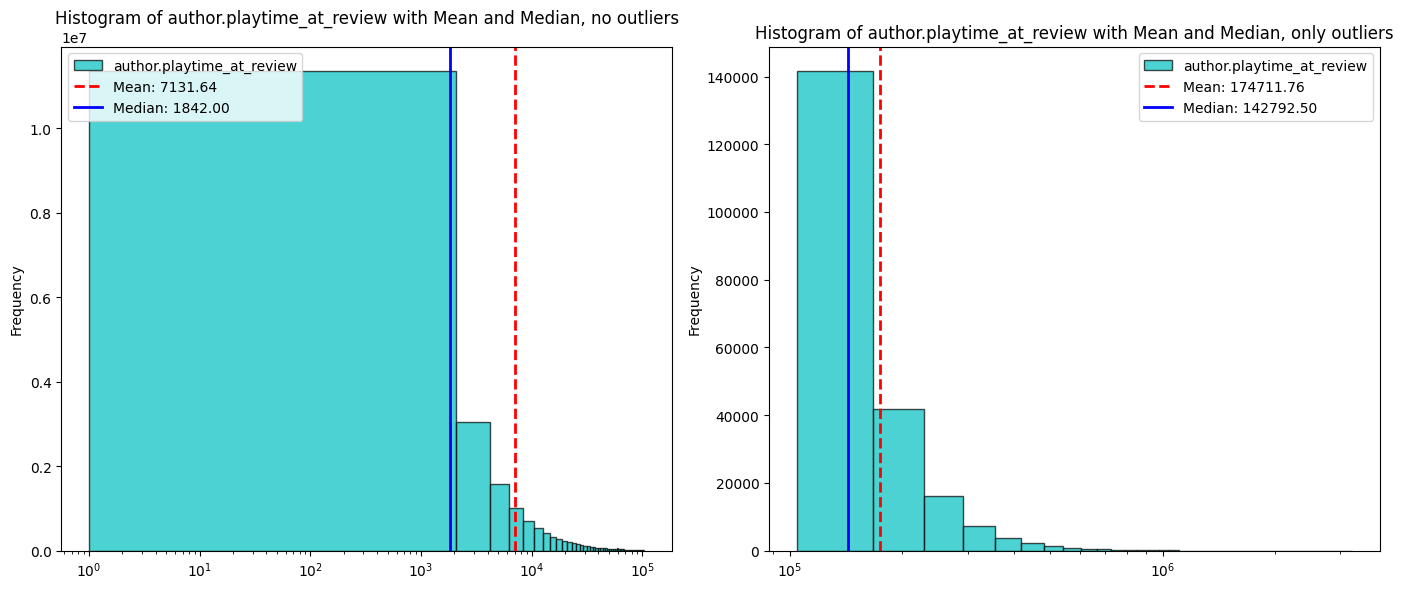

In [ ]:
aut_filt_bel = aut_det_df[aut_det_df['author.playtime_at_review']<=104286]
aut_filt_abov = aut_det_df[aut_det_df['author.playtime_at_review']>104286]

mean_value_b = aut_filt_bel['author.playtime_at_review'].mean()
mean_value_a = aut_filt_abov['author.playtime_at_review'].mean()
median_value_b = aut_filt_bel['author.playtime_at_review'].median()
median_value_a = aut_filt_abov['author.playtime_at_review'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.playtime_at_review'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.playtime_at_review with Mean and Median, no outliers')

aut_filt_abov['author.playtime_at_review'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.playtime_at_review with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()

##### author.last_played

In [ ]:
aut_filt_bel = aut_det_df[aut_det_df['author.playtime_forever']<=14912]
aut_filt_abov = aut_det_df[aut_det_df['author.playtime_forever']>14912]

mean_value_b = aut_filt_bel['author.playtime_forever'].mean()
mean_value_a = aut_filt_abov['author.playtime_forever'].mean()
median_value_b = aut_filt_bel['author.playtime_forever'].median()
median_value_a = aut_filt_abov['author.playtime_forever'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

aut_filt_bel['author.playtime_forever'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black',ax=axes[0])
axes[0].set_xscale('log')
axes[0].axvline(mean_value_b, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_b:.2f}')
axes[0].axvline(median_value_b, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_b:.2f}')
axes[0].legend()
axes[0].set_title('Histogram of author.playtime_forever with Mean and Median, no outliers')

aut_filt_abov['author.playtime_forever'].plot(kind='hist', bins=50, alpha=0.7, color='c', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].axvline(mean_value_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_a:.2f}')
axes[1].axvline(median_value_a, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value_a:.2f}')
axes[1].set_title('Histogram of author.playtime_forever with Mean and Median, only outliers')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
del aut_det_df

## [RQ2] *Distribution of reviews across different applications*

We load the dataset we need, this means that we specify the columns we will need to complete this task in the parameter **usecols** in *pd.read_csv*. Moreover, these are not columns with null values so we will only have to deal with duplicated rows.

In [4]:
rq2_l = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=['app_name','review_id', 'steam_purchase','received_for_free','recommended','weighted_vote_score']):
    review_chunk = chunk.fillna(value='No data')
    rq2_l.append(review_chunk)

rq2 = pd.concat(rq2_l, ignore_index=True)

print(rq2.shape)
rq2.head()

(21747371, 6)


,app_name,review_id,recommended,weighted_vote_score,steam_purchase,received_for_free
0,The Witcher 3: Wild Hunt,85185598,True,0.0,True,False
1,The Witcher 3: Wild Hunt,85185250,True,0.0,True,False
2,The Witcher 3: Wild Hunt,85185111,True,0.0,True,False
3,The Witcher 3: Wild Hunt,85184605,True,0.0,True,False
4,The Witcher 3: Wild Hunt,85184287,True,0.0,True,False


This is something we're going to do each time we load a new dataset, beacuse we don't need duplicates in our analysis.

In [5]:
rq2 = rq2.drop_duplicates() 

#### Identify which applications have the highest and lowest number of reviews.

In [7]:
# Group the rq2 DataFrame by 'app_name', then count the number of reviews ('review_id') for each app.
# Sort the result in descending order based on the review count, reset the index for readability,
# and rename the 'review_id' column to 'review_count' for clarity.
distr_app = rq2[['app_name','review_id']].groupby('app_name').review_id.count().sort_values(ascending=False).reset_index().rename(columns={'review_id': 'review_count'})

# Print the app with the highest number of reviews.
print(f"{distr_app.iloc[0]['app_name']} is the application with the highest number of reviews with {distr_app.iloc[0]['review_count']} reviews.")

# Print the app with the lowest number of reviews.
print(f"{distr_app.iloc[-1]['app_name']} is the application with the lowest number of reviews with {distr_app.iloc[-1]['review_count']} reviews.")


PLAYERUNKNOWN'S BATTLEGROUNDS is the application with the highest number of reviews with 1644255 reviews.
Neon Hardcorps is the application with the lowest number of reviews with 200 reviews.


#### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

A key challenge in visualizing this data is the high number of apps(315), which makes plotting distributions complex. However, an immediate pattern stands out: a few apps have significantly higher review counts compared to the majority. Notably, the app with the highest number of reviews has a substantially greater count than the second most reviewed app, highlighting a stark disparity in review frequency across applications. This suggests that a small subset of apps dominates the review volume.

c:\Users\Paolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Paolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Paolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Paolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Paolo\AppData\Local\Programs\Python

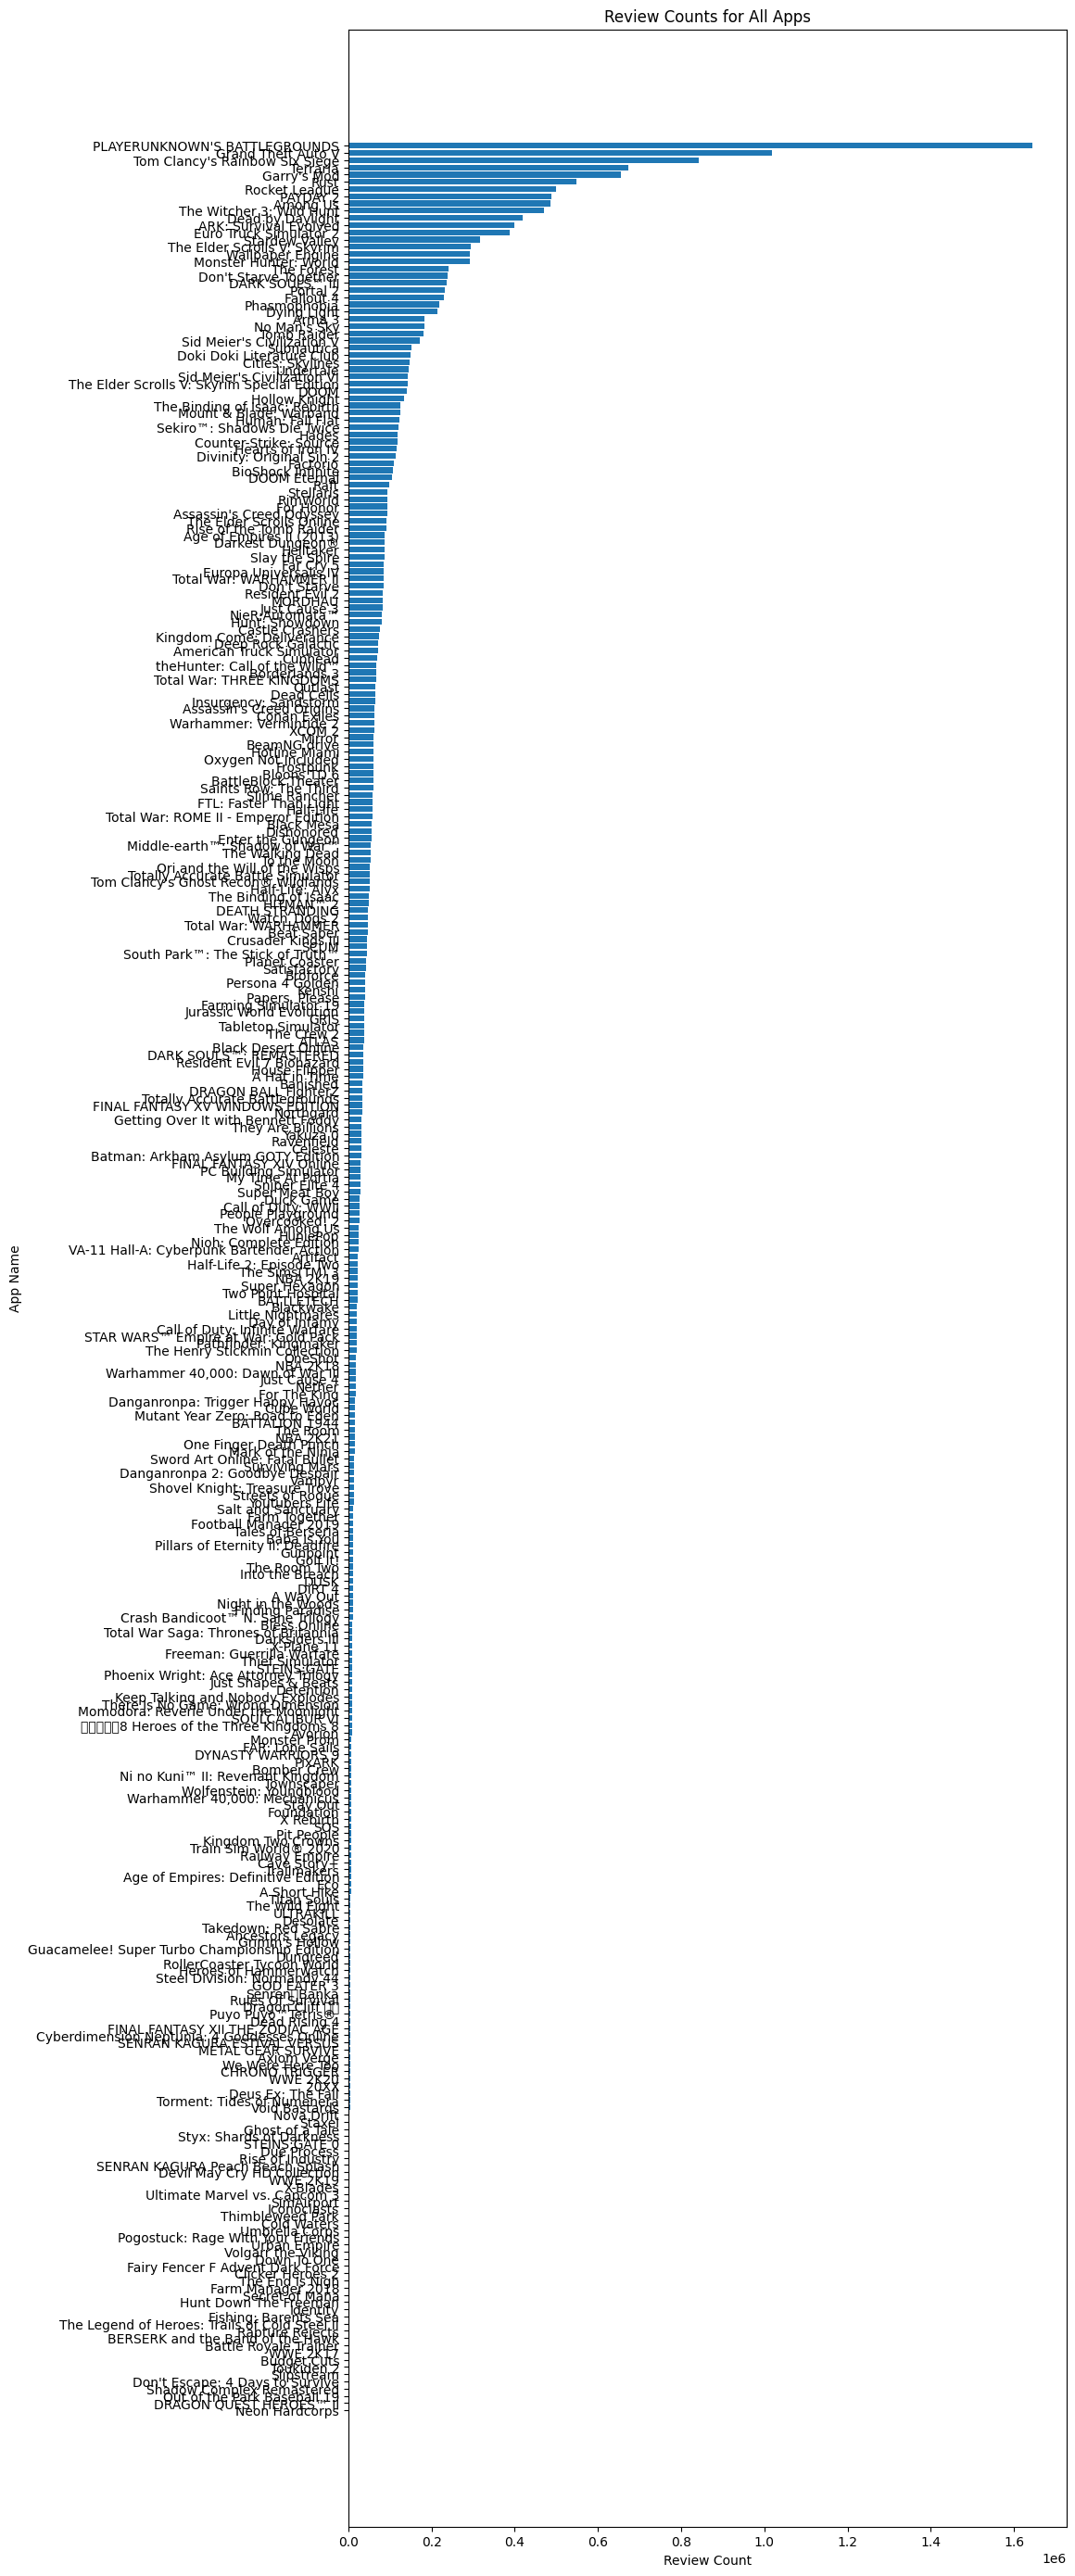

In [8]:
plt.figure(figsize=(10, 35))
plt.barh(distr_app['app_name'], distr_app['review_count'])
plt.xlabel('Review Count')
plt.ylabel('App Name')
plt.title('Review Counts for All Apps')
plt.gca().invert_yaxis()
plt.show()

#### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

The top 5 applications share a similar pattern in review sources: a large majority of reviews come from users who purchased the application, with percentages ranging from about 78% to 88%. In contrast, reviews from users who received the app for free remain low, typically around 3-4%. The "other" category, representing alternative acquisition methods, consistently makes up between 7% and 18% of reviews. This trend suggests that feedback for popular apps on Steam is largely driven by paying users, with relatively few contributions from free users across these top titles.

In [9]:
# Select the top 5 applications by review count
top_five = distr_app.iloc[:5] 
# Filter reviews where the application was purchased and count reviews per app
rev_purch = rq2[rq2['steam_purchase'] == True].groupby('app_name').review_id.count().reset_index()
# Rename column to indicate purchase count
rev_purch.rename(columns={'review_id': 'purch_count'}, inplace=True)

# Filter reviews where the application was received for free and count reviews per app
rev_free = rq2[rq2['received_for_free'] == True].groupby('app_name').review_id.count().reset_index()
# Rename column to indicate free count
rev_free.rename(columns={'review_id': 'free_count'}, inplace=True)

# Merge the top 5 apps with purchase counts
top_com = top_five.merge(rev_purch, on='app_name', how='left')
# Merge the result with free counts
top_com = top_com.merge(rev_free, on='app_name', how='left')

# Calculate the count of "Other" reviews (neither purchased nor free)
top_com['other_count'] = top_com['review_count'] - (top_com['purch_count'] + top_com['free_count'])

# Calculate percentage of purchased reviews out of total reviews
top_com['purch_percent'] = round((top_com['purch_count'] / top_com['review_count']) * 100, 2)
# Calculate percentage of free reviews out of total reviews
top_com['free_percent'] = round((top_com['free_count'] / top_com['review_count']) * 100, 2)
# Calculate percentage of "Other" reviews out of total reviews
top_com['other_percent'] = round((top_com['other_count'] / top_com['review_count']) * 100, 2)

top_com


,app_name,review_count,purch_count,free_count,other_count,purch_percent,free_percent,other_percent
0,PLAYERUNKNOWN'S BATTLEGROUNDS,1644255,1372721,61443,210091,83.49,3.74,12.78
1,Grand Theft Auto V,1019116,905288,38624,75204,88.83,3.79,7.38
2,Tom Clancy's Rainbow Six Siege,841918,702505,36300,103113,83.44,4.31,12.25
3,Terraria,672815,527762,20154,124899,78.44,3.00,18.56
4,Garry's Mod,655524,551250,24765,79509,84.09,3.78,12.13


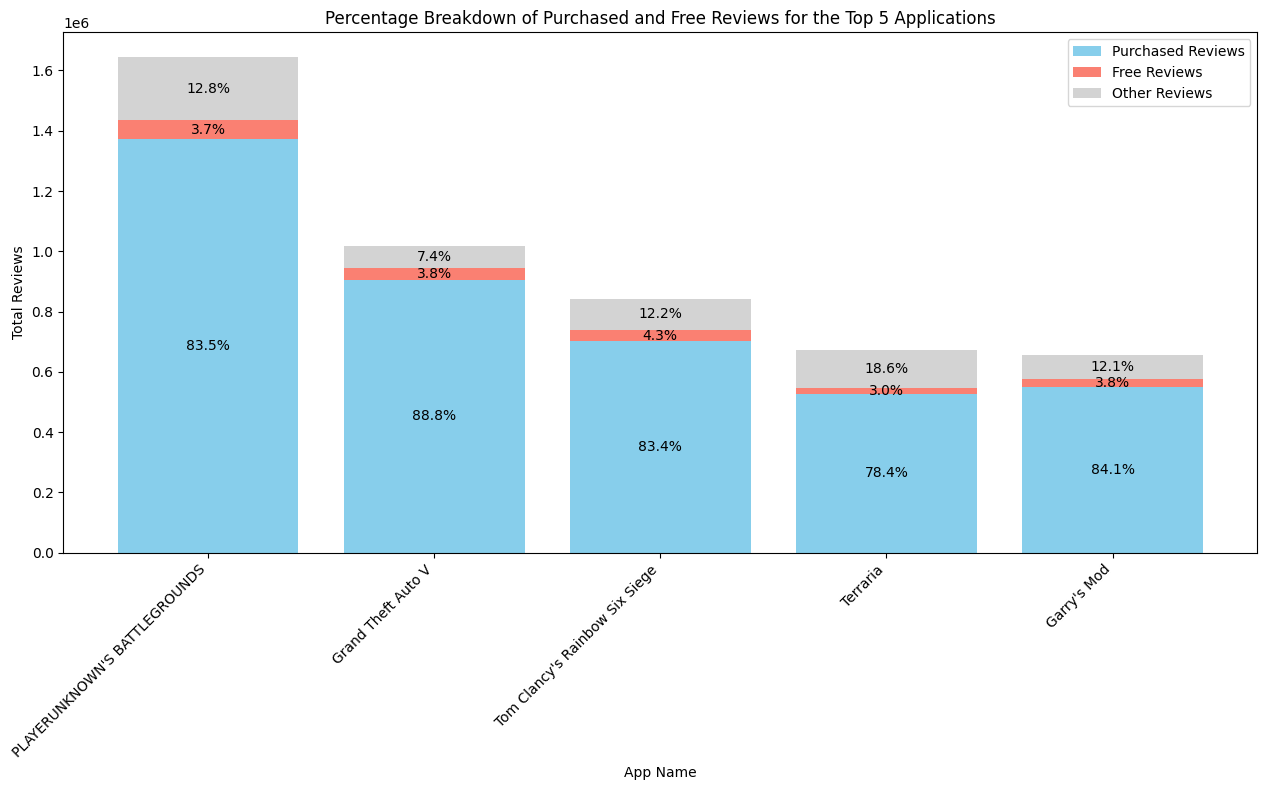

In [10]:
plt.figure(figsize=(13, 8))
# Plot Purchased Reviews
plt.bar(top_com['app_name'], top_com['purch_count'], label='Purchased Reviews', color='skyblue')
# Plot Free Reviews on top of Purchased
plt.bar(top_com['app_name'], top_com['free_count'], bottom=top_com['purch_count'], label='Free Reviews', color='salmon')
# Plot Other Reviews on top of Free + Purchased
plt.bar(top_com['app_name'], top_com['other_count'], bottom=top_com['purch_count'] + top_com['free_count'], label='Other Reviews', color='lightgray')
# Annotate percentages on each segment
for index, row in top_com.iterrows():
    plt.text(row['app_name'], row['purch_count'] / 2, f"{row['purch_percent']:.1f}%", ha='center', va='center', color='black')  # Purchased percentage
    plt.text(row['app_name'], row['purch_count'] + row['free_count'] / 2, f"{row['free_percent']:.1f}%", ha='center', va='center', color='black')  # Free percentage
    plt.text(row['app_name'], row['purch_count'] + row['free_count'] + row['other_count'] / 2, f"{row['other_percent']:.1f}%", ha='center', va='center', color='black')  # Other percentage

plt.xlabel('App Name')
plt.ylabel('Total Reviews')
plt.title('Percentage Breakdown of Purchased and Free Reviews for the Top 5 Applications')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



#### Which applications have the most and the least user recommendations? Summarize your findings.

In [11]:
# Filter reviews where the application is recommended
rec = rq2[rq2['recommended'] == True]

# Group the recommended reviews by app name and calculate:
# 1. Total number of recommendations for each app
# 2. Average score (weighted vote score) for each app
rec_app = rec.groupby('app_name').agg(
    recommendation_count=('recommended', 'sum'),  # Sum of True values gives the count of recommendations
    avg_score=('weighted_vote_score', 'mean')      # Calculate the mean weighted vote score for each app
).sort_values(by='recommendation_count', ascending=False).reset_index()

# Print the app with the highest number of recommendations
print(f"{rec_app.iloc[0]['app_name']} is the application with the highest number of recommendations with {rec_app.iloc[0]['recommendation_count']} recommendations.")

# Print the app with the lowest number of recommendations
print(f"{rec_app.iloc[-1]['app_name']} is the application with the lowest number of recommendations with {rec_app.iloc[-1]['recommendation_count']} recommendations.")

# Display the top rows of the resulting DataFrame
rec_app.head()

PLAYERUNKNOWN'S BATTLEGROUNDS is the application with the highest number of recommendations with 886417 recommendations.
Neon Hardcorps is the application with the lowest number of recommendations with 89 recommendations.


,app_name,recommendation_count,avg_score
0,PLAYERUNKNOWN'S BATTLEGROUNDS,886417,0.143018
1,Grand Theft Auto V,831311,0.133696
2,Tom Clancy's Rainbow Six Siege,742397,0.142779
3,Terraria,658741,0.134516
4,Garry's Mod,632558,0.150688


#### Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.

The **Pearson** correlation coefficient of -0.2886 suggests a weak to moderate negative linear relationship between the number of recommendations and the average score. This means that, on average, as the number of recommendations increases, the average score tends to decrease slightly. However, since the value is closer to zero than to -1, the linear relationship is not strong, indicating that there may be other factors influencing the average score.

The **Spearman** correlation coefficient of -0.6157 indicates a moderate to strong negative monotonic relationship between the number of recommendations and the average review score. This implies that as the number of recommendations increases, the ranks of the average scores tend to decrease. The stronger Spearman correlation suggests that there might be a consistent trend regardless of the actual values, which could imply that the highest-ranked applications (by recommendation count) tend to have lower average scores.

The **Kendall** correlation coefficient of -0.4363 also suggests a moderate negative relationship between the two variables. This coefficient supports the conclusion reached by the other two correlations, indicating that higher recommendation counts are associated with lower average scores.

The negative correlation across all three methods suggests that there is a trend where applications with more recommendations have lower average review scores.

In [12]:
pearson = rec_app[['recommendation_count','avg_score']].corr()
spearman = rec_app[['recommendation_count','avg_score']].corr(method='spearman')
kendall = rec_app[['recommendation_count','avg_score']].corr(method='kendall')

print(f"Pearson's Correlation:\n{pearson}\n")
print(f"Spearman's Correlation:\n{spearman}\n") 
print(f"Kendall's Correlation:\n{kendall}\n") 

Pearson's Correlation:
                      recommendation_count  avg_score
recommendation_count              1.000000  -0.288614
avg_score                        -0.288614   1.000000

Spearman's Correlation:
                      recommendation_count  avg_score
recommendation_count              1.000000  -0.615661
avg_score                        -0.615661   1.000000

Kendall's Correlation:
                      recommendation_count  avg_score
recommendation_count               1.00000   -0.43628
avg_score                         -0.43628    1.00000



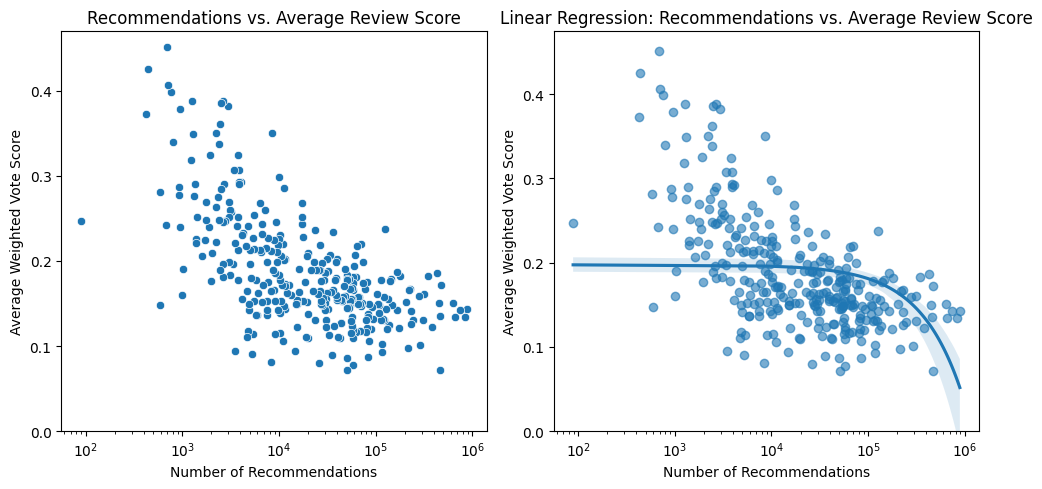

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

sns.scatterplot(data=rec_app, x='recommendation_count', y='avg_score', ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title('Recommendations vs. Average Review Score')
axes[0].set_xlabel('Number of Recommendations')
axes[0].set_ylabel('Average Weighted Vote Score')
axes[0].set_ylim(0)

# Create the regression plot
sns.regplot(data=rec_app, x='recommendation_count', y='avg_score', scatter_kws={'alpha': 0.6}, ax=axes[1])
axes[1].set_title('Linear Regression: Recommendations vs. Average Review Score')
axes[1].set_xlabel('Number of Recommendations')
axes[1].set_ylabel('Average Weighted Vote Score')
axes[1].set_xscale('log')
axes[1].set_ylim(0)

plt.tight_layout()
plt.show()


The analysis reveals a negative relationship between the number of recommendations and average scores for applications. The Pearson correlation of -0.29 indicates a weak inverse linear trend, while Spearman and Kendall Tau correlations of -0.62 and -0.44 suggest a stronger negative association. The p-values associated with these correlations are extremely low, confirming the statistical significance of the relationships. Specifically, the p-value for Pearson correlation is approximately $1.85 \times 10^{-7}$, while for Spearman and Kendall Tau, they are around $2.99 \times 10^{-34}$ and $7.34 \times 10^{-31}$ respectively. These results indicate that the observed negative correlations are unlikely to have occurred by chance, reinforcing the conclusion that higher recommendation counts are associated with lower average scores.

In [17]:
from scipy import stats

pearson_corr, pearson_p_value = stats.pearsonr(rec_app['recommendation_count'], rec_app['avg_score'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")
spearman_corr, spearman_p_value = stats.spearmanr(rec_app['recommendation_count'], rec_app['avg_score'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")
kendall_corr, kendall_p_value = stats.kendalltau(rec_app['recommendation_count'], rec_app['avg_score'])
print(f"Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p_value}")



Pearson correlation: -0.28861420437573626, p-value: 1.8542251999589913e-07
Spearman correlation: -0.6156608247295062, p-value: 2.998458490154002e-34
Kendall Tau correlation: -0.4362798127794787, p-value: 7.340356485224194e-31


Delete **rq2_l** and **rq2** to free up memory.

In [9]:
del rq2_l

In [10]:
del rq2

## [RQ3] *When users are most active in submitting reviews*

We load the dataset we need, this means that we specify the columns we will need to complete this task in the parameter **usecols** in *pd.read_csv*. In this case we will first change **timestamp_created** and **timestamp_updated** in datetime format, then remove duplicates.

In [21]:
rq3_l = []

for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=['review_id', 'timestamp_created','timestamp_updated']):
    review_chunk = chunk.fillna(value='No data')
    rq3_l.append(review_chunk)

rq3 = pd.concat(rq3_l, ignore_index=True)
rq3['timestamp_created'] = pd.to_datetime(rq3['timestamp_created'], unit='s')
rq3['timestamp_updated'] = pd.to_datetime(rq3['timestamp_updated'], unit='s')
print(rq3.shape)
rq3.head()

(21747371, 3)


,review_id,timestamp_created,timestamp_updated
0,85185598,2021-01-23 06:00:29,2021-01-23 06:00:29
1,85185250,2021-01-23 05:50:30,2021-01-23 05:50:30
2,85185111,2021-01-23 05:46:40,2021-01-23 05:46:40
3,85184605,2021-01-23 05:32:50,2021-01-23 05:32:50
4,85184287,2021-01-23 05:23:47,2021-01-23 05:23:47


In [22]:
rq3 = rq3.drop_duplicates()

#### Plot the number of reviews submitted each month and describe any trends.

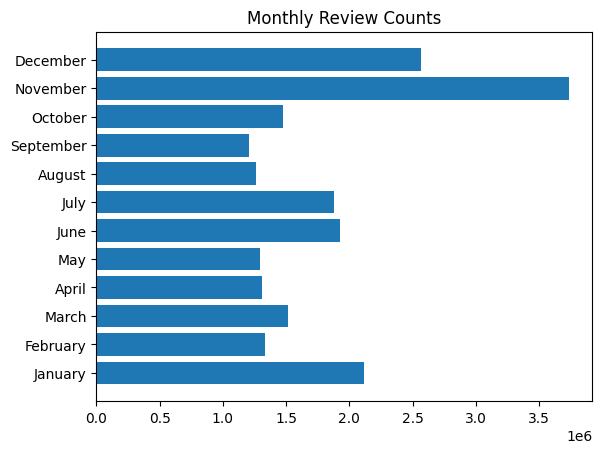

In [23]:
# Extract the month from 'timestamp_created', and assign it to a new column named 'month'. This will give integer values from 1 to 12,
# corresponding to each month (1 for January, 2 for February, etc.).
rq3['month'] = rq3['timestamp_created'].dt.month

# Group the data by the 'month' column and count the number of 'review_id' entries for each month
month_count = rq3.groupby('month').review_id.count().reset_index().sort_values(by='month')

# Convert the 'month' column from numbers to full month names (1 -> January, 2 -> February, etc.)
month_count['month'] = pd.to_datetime(month_count['month'], format="%m").dt.strftime("%B")

plt.barh(month_count['month'], month_count['review_id'])
plt.title("Monthly Review Counts")
plt.show()


#### Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.

The analysis suggests that high review counts in November, December, and January may be driven by seasonal trends. The holiday season, marked by Black Friday, Cyber Monday, and Christmas, stimulates product purchases and usage, leading to increased reviews. Additionally, gifts received during the holidays often result in reviews in late December and early January. January also sees a rise in engagement due to New Year's resolutions and holiday downtime, as users focus on health and productivity apps.

In contrast, lower review counts from March to October can be attributed to a lack of significant shopping events during these months. The mid-year period often lacks major holidays, leading to decreased purchasing and review activity. The back-to-school season in August and September diverts attention away from product reviews. Furthermore, summer vacations reduce online engagement, and there are typically fewer product releases, which contributes to the decline in reviews. Lastly, market-specific trends may also play a role, as certain industries time their launches for the holiday season, resulting in a spike in reviews towards the year's end.

#### Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.

The observed trends suggest that review counts are influenced by well-known seasonal events and user behavior patterns. High counts in November, December, and January likely reflect holiday-driven engagement, while mid-year lulls align with vacations and fewer major events. Understanding these trends could be valuable for scheduling promotions, product launches, or customer engagement strategies to maximize review activity.

#### What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.

In [28]:
rq3['minute'] = rq3['timestamp_created'].dt.minute
rq3['hour'] = rq3['timestamp_created'].dt.hour

# Create a new column to label each 10-minute interval
rq3['time_interval'] = rq3['minute'].apply(lambda x: f"{(x // 10) * 10}-{(x // 10) * 10 + 9}")

rq3.head()

,review_id,timestamp_created,timestamp_updated,month,minute,hour,time_interval
0,85185598,2021-01-23 06:00:29,2021-01-23 06:00:29,1,0,6,0-9
1,85185250,2021-01-23 05:50:30,2021-01-23 05:50:30,1,50,5,50-59
2,85185111,2021-01-23 05:46:40,2021-01-23 05:46:40,1,46,5,40-49
3,85184605,2021-01-23 05:32:50,2021-01-23 05:32:50,1,32,5,30-39
4,85184287,2021-01-23 05:23:47,2021-01-23 05:23:47,1,23,5,20-29


Peak activity occurs during hours 14 and 18, suggesting that users are most engaged in submitting reviews during mid-afternoon and early evening. Conversely, the lowest activity is observed in the early morning hours (2-7), particularly in hours 5 and 6, which show significantly low review counts. This pattern indicates a potential correlation between user availability and review submissions.

Review counts generally increase throughout the day, with noticeable peaks in the late morning and early afternoon before gradually declining in the evening. This trend may reflect users’ daily routines, where increased leisure time during lunch and after work leads to higher review activity. The observed peak in review submissions during hours 14 and 18 may be attributed to increased user engagement during these times, possibly due to users having more free time to reflect on their experiences. In contrast, lower activity in the early morning hours suggests that users are less likely to engage with the platform before their daily activities start.

Overall, review submissions are most frequent during the afternoon and early evening, with a marked decline as the day progresses into the night. Understanding these patterns can inform strategies for targeted user engagement, maximizing opportunities during peak activity periods.



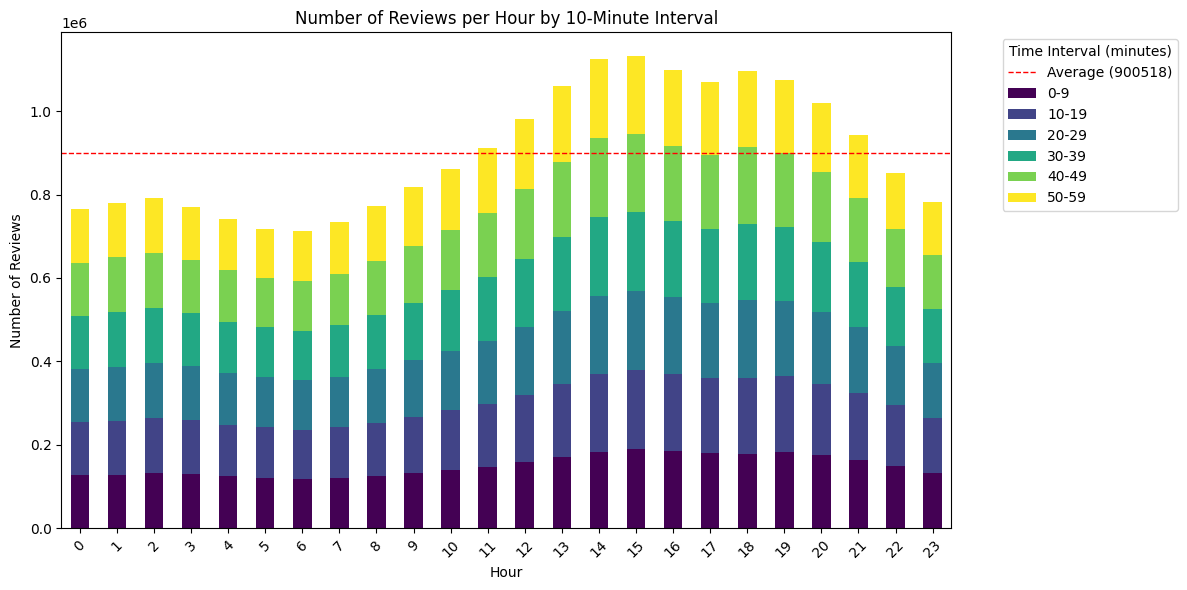

In [27]:
data = rq3.groupby(['hour', 'time_interval']).size().unstack(fill_value=0)
# Calculate the total reviews per hour 
total_reviews_per_hour = data.sum(axis=1)
# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
# Add an average line
average_reviews = total_reviews_per_hour.mean()
ax.axhline(y=average_reviews, color='red', linestyle='--', linewidth=1, label=f'Average ({int(average_reviews)})')

plt.title('Number of Reviews per Hour by 10-Minute Interval')
plt.xlabel('Hour')
plt.ylabel('Number of Reviews')
plt.legend(title='Time Interval (minutes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Create a function that accepts a list of time intervals and plots the number of reviews for each interval.

In [29]:
rq3["total_seconds"] = rq3['hour']* 3600 + rq3['minute']* 60 + rq3['timestamp_created'].dt.second
rq3.head()

,review_id,timestamp_created,timestamp_updated,month,minute,hour,time_interval,total_seconds
0,85185598,2021-01-23 06:00:29,2021-01-23 06:00:29,1,0,6,0-9,21629
1,85185250,2021-01-23 05:50:30,2021-01-23 05:50:30,1,50,5,50-59,21030
2,85185111,2021-01-23 05:46:40,2021-01-23 05:46:40,1,46,5,40-49,20800
3,85184605,2021-01-23 05:32:50,2021-01-23 05:32:50,1,32,5,30-39,19970
4,85184287,2021-01-23 05:23:47,2021-01-23 05:23:47,1,23,5,20-29,19427


In [30]:
def plot_reviews_by_intervals(time_intervals_list):
    use = rq3
    rev_interv = {}
    for interval in time_intervals_list:
        start_seconds = pd.to_timedelta(interval[0]).total_seconds()
        end_seconds = pd.to_timedelta(interval[1]).total_seconds()
        use_filt = use.loc[(use['total_seconds']>= start_seconds)&(use['total_seconds']<= end_seconds)]
        rev_interv[f"{interval[0]} - {interval[1]}"] = use_filt.review_id.count()
        use = use[~use.index.isin(use_filt.index)]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(rev_interv.keys(), rev_interv.values(), color='red')
    plt.title('Number of Reviews for Specified Time Intervals')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#time_intervals = [["00:00:00", "02:59:59"],["06:30:00", "09:59:59"],["13:30:00", "15:59:59"],["17:45:30", "19:59:59"],["21:00:00", "22:59:59"]]
#plot_reviews_by_intervals(time_intervals)


#### Use the function to plot the number of reviews for the following time intervals:

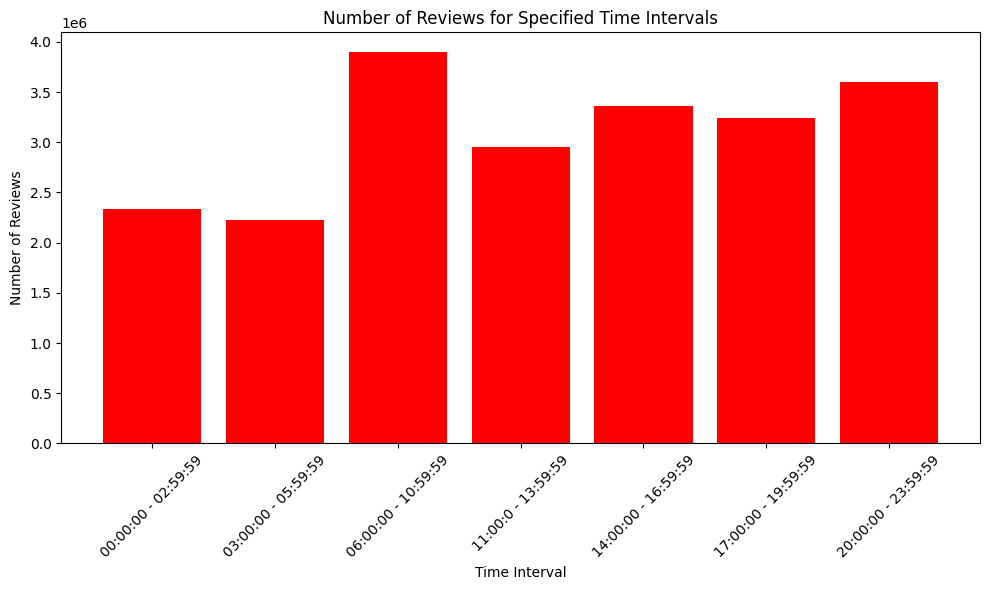

In [31]:
intervals_test = [
    ["00:00:00", "02:59:59"],
    ["03:00:00", "05:59:59"],
    ["06:00:00", "10:59:59"],
    ["11:00:0", "13:59:59"],
    ["14:00:00", "16:59:59"],
    ["17:00:00", "19:59:59"],
    ["20:00:00", "23:59:59"]
]
plot_reviews_by_intervals(intervals_test)

#### Summarize your findings from the time interval analysis.

From this plot, it is clear that the peak in review submissions occurs between the 6 and 11 hour intervals. This peak stands out because it spans 5 hours, while all other intervals are limited to 3 hours, leading to a higher number of reviews during this time. Additionally, there is a noticeable peak in the last 4 hours of the day, which also results from the longer time range compared to the 3-hour intervals earlier. These findings highlight how the length of the time range can impact the volume of reviews submitted.

Delete data to free up memory.

In [32]:
del rq3_l

In [33]:
del rq3

## [RQ4] *Investigating whether users who spend more time using an application give higher or lower ratings*

We load the dataset we need, this means that we specify the columns we will need to complete this task in the parameter **usecols** in *pd.read_csv*. In this case we will have to deal with null values regarding 'author.playtime_at_review', that will be filled with 0, and also we will have to deal with some outliers. 

In [35]:
rq4_l = []
usec = ['review_id','author.playtime_at_review', 'recommended']
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=usec):
    review_chunk = chunk.fillna(value=0)
    rq4_l.append(review_chunk)

rq4 = pd.concat(rq4_l, ignore_index=True)
print(rq4.shape)
rq4.head()

(21747371, 3)


,review_id,recommended,author.playtime_at_review
0,85185598,True,1909.0
1,85185250,True,2674.0
2,85185111,True,1060.0
3,85184605,True,5524.0
4,85184287,True,217.0


In [37]:
rq4 = rq4.drop_duplicates()

In [ ]:
rq4['recommended'] = rq4['recommended'].astype(int)

,review_id,recommended,author.playtime_at_review
0,85185598,1,1909.0
1,85185250,1,2674.0
2,85185111,1,1060.0
3,85184605,1,5524.0
4,85184287,1,217.0


This distribution shows that while most users have moderate playtimes, a few outliers with extremely high playtimes inflate the mean.

In [40]:
# Set the float display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
rq4['author.playtime_at_review'].describe()

count   21612444.00
mean        8835.09
std        23941.44
min            0.00
25%          555.00
50%         1874.00
75%         6859.00
max      3228103.00
Name: author.playtime_at_review, dtype: float64

In this code, we’re identifying and removing outliers from the **author.playtime_at_review** column using the interquartile range (IQR) method. First, we calculate the 25th (Q1) and 75th (Q3) percentiles of the playtime data, then determine the IQR by subtracting Q1 from Q3. We define lower and upper bounds for acceptable values as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively. Finally, we filter the DataFrame to retain only rows within these bounds, effectively removing any rows where playtime falls significantly above or below the typical range. This process helps focus the analysis on the main distribution without extreme outliers.

In [53]:
Q1 = rq4['author.playtime_at_review'].quantile(0.25)
Q3 = rq4['author.playtime_at_review'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
rq4_no_outliers = rq4[(rq4['author.playtime_at_review'] >= lower_bound) & 
                    (rq4['author.playtime_at_review'] <= upper_bound)]


In [62]:
rq4_no_outliers.shape

(18797433, 4)

#### Analyze the relationship between the amount of time a user has spent on an application and their review score.

In this approach, we categorize the **author.playtime_at_review** column into defined playtime classes. We define these classes using bins, making it easier to observe patterns across playtime intervals without removing any data points. By grouping recommendations based on these playtime classes, we calculate the total true and false recommendations within each interval. This classification provides insights into how recommendation tendencies may vary with different levels of user engagement.

From the plot, we can observe that a significant number of reviews recommending the app occur within the first 500 minutes of playtime at review, alongside a relatively large number of false recommendations. Furthermore, the number of false recommendations remains constant across playtime classes, while true recommendations has a peak in between 1000-2500 and then decreases as playtime increases.

C:\Users\Paolo\AppData\Local\Temp\ipykernel_23016\4291538656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq4_no_outliers['playtime_class'] = pd.cut(rq4_no_outliers['author.playtime_at_review'], bins=bins, labels=labels, right=False)
C:\Users\Paolo\AppData\Local\Temp\ipykernel_23016\4291538656.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recc_count = rq4_no_outliers.groupby(['playtime_class', 'recommended']).size().reset_index(name='count')


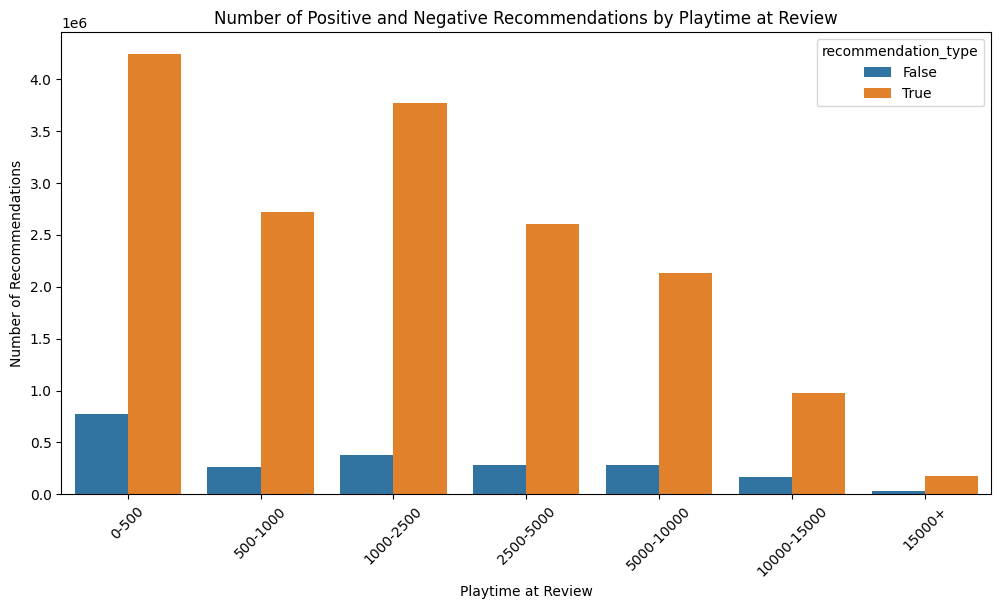

In [61]:
# Define new playtime bins and labels with a maximum of 7 categories
bins = [0, 500, 1000, 2500, 5000, 10000, 15000, float('inf')]
labels = ['0-500', '500-1000', '1000-2500', '2500-5000', '5000-10000', '10000-15000', '15000+']

# Bin playtime and group recommendations
rq4_no_outliers['playtime_class'] = pd.cut(rq4_no_outliers['author.playtime_at_review'], bins=bins, labels=labels, right=False)
recc_count = rq4_no_outliers.groupby(['playtime_class', 'recommended']).size().reset_index(name='count')
recc_count['recommendation_type'] = recc_count['recommended'].map({1: 'True', 0: 'False'})

# Plot recommendations by playtime class
plt.figure(figsize=(12, 6))
sns.barplot(data=recc_count, x='playtime_class', y='count', hue='recommendation_type')
plt.xlabel('Playtime at Review')
plt.ylabel('Number of Recommendations')
plt.title('Number of Positive and Negative Recommendations by Playtime at Review')
plt.xticks(rotation=45)
plt.show()



#### Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

In [64]:
# We take the median as a way to divide new users and experienced users
median_value_rq4 = rq4_no_outliers['author.playtime_at_review'].median()
# Creating a new column in the dataframe, where the value is either Above or Below Median.
rq4_no_outliers['experience_level'] = rq4_no_outliers['author.playtime_at_review'].apply(lambda x: 'Above Median' if x > median_value_rq4 else 'Below Median')

C:\Users\Paolo\AppData\Local\Temp\ipykernel_23016\3429307251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq4_no_outliers['experience_level'] = rq4_no_outliers['author.playtime_at_review'].apply(lambda x: 'Above Median' if x > median_value_rq4 else 'Below Median')


In [66]:
# Calculate recommendations by experience level
def calculate_recommendations(df, recommendation_col, rec_type):
    rec_summary = df.groupby('experience_level')[recommendation_col].sum().reset_index()
    total_recommendations = rec_summary[recommendation_col].sum()
    
    rec_summary['percentage'] = (rec_summary[recommendation_col] / total_recommendations) * 100
    rec_summary['recc_type'] = rec_type
    rec_summary.rename(columns={recommendation_col: 'count'}, inplace=True)
    
    return rec_summary

# Positive recommendations
reccom_by_userex = calculate_recommendations(rq4_no_outliers, 'recommended', 'Positive')

# Negative recommendations
not_recc_by_userex = rq4_no_outliers[rq4_no_outliers['recommended'] == 0].groupby('experience_level').size().reset_index(name='not_recommended')
not_recc_by_userex['percentage'] = (not_recc_by_userex['not_recommended'] / not_recc_by_userex['not_recommended'].sum()) * 100
not_recc_by_userex['recc_type'] = 'Negative'
not_recc_by_userex.rename(columns={'not_recommended': 'count'}, inplace=True)

# Combine positive and negative recommendations
by_user_to_plot = pd.concat([reccom_by_userex, not_recc_by_userex], ignore_index=True)


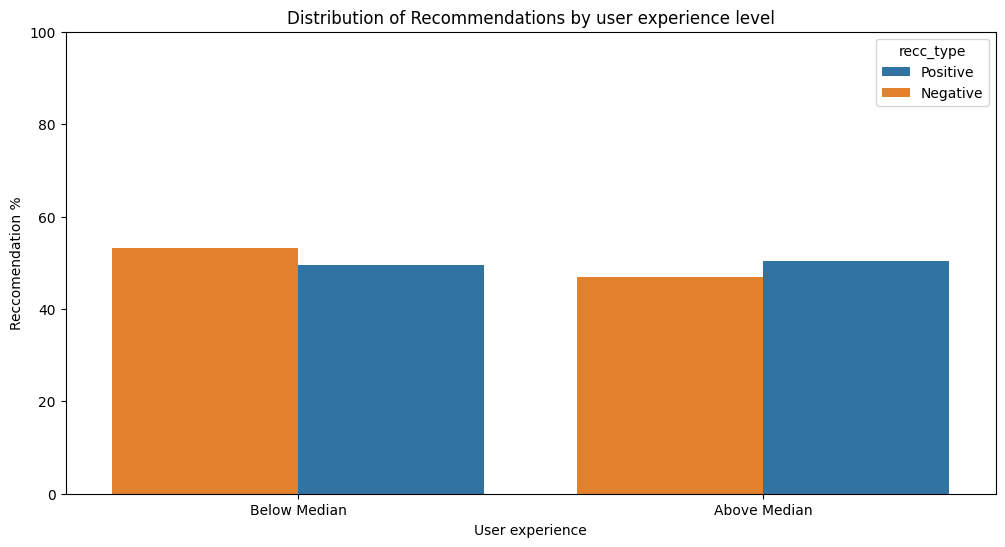

In [67]:
plt.figure(figsize=(12, 6))
plt.ticklabel_format(style = 'plain')   # Without this line the y axis is in 1e6
sns.barplot(data=by_user_to_plot, x='experience_level', y='percentage', hue='recc_type')
plt.gca().invert_xaxis() # Used to place Below Median before Above Median on the x axis because it makes more sense to me
plt.xlabel('User experience')
plt.ylabel('Reccomendation %')
plt.ylim((0,100))  # Y axis goes from 0 to 100 to better represent percentage
plt.title('Distribution of Recommendations by user experience level')
plt.show()

The percentages are fairly balanced, with most users below the median making negative recommendations, while those above the median tend to be more positive.

#### Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

An hypothesis we would like to test is if there is a dependence between user experience and recommendation type.
To test our hyphothesis we can use the chi-squared test of independence.
The aim of this is test is to nalyze whether the characteristic values of the first variable are influenced by the characteristic values of the second variable and vice versa, given two categorical variables.
In our analysis the two categorical variables are user experience and recommend or not recommend.

1. Calculate a table with expected frequency if independent
2. Calculate the Chi-square

In [68]:
from scipy.stats import chi2_contingency    # Library for an easy chi2 computation

# We first need to create a contingency table to perform the chi2 test on, slightly different from the dataframe we have worked so far
contingency_table = pd.pivot_table(by_user_to_plot,
                                     index='experience_level',
                                     columns='recc_type',
                                     values='count',
                                     aggfunc='sum',
                                     fill_value=0)

print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Useful to print the values to actually give an interpretation of the test
print("\nChi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)

recc_type         Negative  Positive
experience_level                    
Above Median       1019718   8378253
Below Median       1158455   8241007

Chi-Squared Statistic: 9969.892713279703
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
 [[1089000.11437642 8308970.88562358]
 [1089172.88562358 8310289.11437642]]


#### Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

The analysis shows that users above the median experience level provide significantly more positive recommendations (8,378,253) compared to those below the median (8,241,007), despite a higher number of negative recommendations from users below the median (1,158,455) versus above (1,019,718). The Chi-Squared statistic (9969.89) and a p-value of 0.0 indicate a strong association between experience level and recommendation type.

This trend may suggest that users who spend more time on the app tend to have better experiences, leading to higher ratings. Additional factors that could explain these differences include user engagement with app features, customer support experiences, or the impact of social interactions within the app.

To validate these interpretations, one could conduct user surveys to gather qualitative feedback, analyze specific app feature usage data, or perform regression analysis to investigate other variables influencing user ratings. This would help confirm or refute the interpretations provided.

In [69]:
del rq4_l

In [70]:
del rq4

In [71]:
del rq4_no_outliers

## [RQ5] Explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

First you have to run the [Reviews Dataset](#reviews-dataset) section.


Because you need **null_rev_ids** to select   only reviews that dont have null values.

We load the dataset we need, this means that we specify the columns we will need to complete this task in the parameter **usecols** in *pd.read_csv*. In this case we will have to deal with outliers in  **author.num_reviews**.

In [ ]:
rq5_l = []
usec = ['app_name','app_id','review_id','author.steamid', 'language','weighted_vote_score']
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=usec):
    review_chunk = chunk.fillna(value=0)
    # Filter rows where 'review_id' is not in 'null_rev_ids'
    filtered_chunk = review_chunk[~review_chunk['review_id'].isin(null_rev_ids)]
    rq5_l.append(filtered_chunk)

rq5 = pd.concat(rq5_l, ignore_index=True)
print(rq5.shape)
rq5.head()

(21713623, 6)


,app_id,app_name,review_id,language,weighted_vote_score,author.steamid
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,0.0,76561199095369542
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,0.0,76561198949504115
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,0.0,76561199090098988
3,292030,The Witcher 3: Wild Hunt,85184605,english,0.0,76561199054755373
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,0.0,76561199028326951


In [15]:
rq5 = rq5.drop_duplicates()

In [16]:
rq5.shape

(21578868, 6)

Before answering these questions we first need to take into account few considerations. To identify the top 10 reviewers we could potentionally proceed by either looking at the author.num_reviews column or by counting the number of unique reviews present in the dataset written by each user. As the question states: "highest number of reviews in the dataset", we consider it to be reffering to this particular version of the dataset that we have at hand and hence proceed with the latter option. In the downstream analysis, we will refer to these reviewers as the 'Top 10 reviewers'. 


#### Determine the ten reviewers with the highest number of reviews in the dataset.

In [17]:
# Obtains the list of the top 10 reviewers
top_reviewers = rq5['author.steamid'].value_counts().head(10)
print(top_reviewers)

author.steamid
76561198062813911    148
76561198315585536    131
76561198192166873    106
76561198239163744    106
76561198045381877    102
76561198064946151     99
76561198013146396     98
76561198027973295     96
76561197969749884     88
76561197989746995     85
Name: count, dtype: int64


#### What is the percentage of each language used by these top 10 reviewers when submitting a review?

In [18]:
# Creates a dataframe with data pertainign to only the top 10 reviewers.
top_reviewers_df = rq5[rq5['author.steamid'].isin(top_reviewers.index)]
top_reviewers_df.head()

,app_id,app_name,review_id,language,weighted_vote_score,author.steamid
59948,292030,The Witcher 3: Wild Hunt,75682403,english,0.522546,76561198045381877
78241,292030,The Witcher 3: Wild Hunt,72706950,russian,0.000000,76561198013146396
269844,292030,The Witcher 3: Wild Hunt,50055318,english,0.562405,76561198315585536
324221,292030,The Witcher 3: Wild Hunt,41215985,english,0.480519,76561198064946151
386818,292030,The Witcher 3: Wild Hunt,30524667,english,0.524633,76561197969749884


In [19]:
# Percentage of reviews written by top ten reviewers based on language used.
top_rev_lang_count = top_reviewers_df.groupby(['language'])['language'].count()
top_rev_lang_percent = (top_rev_lang_count/top_rev_lang_count.sum())*100

print(top_rev_lang_percent)

language
english     53.918791
russian     28.234183
schinese    17.847025
Name: language, dtype: float64


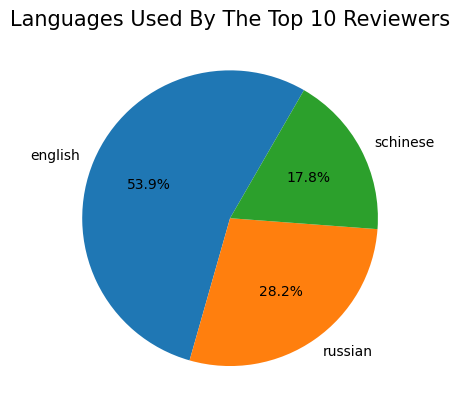

In [20]:
# Pie plot for the languages used in the reviews of the top 10 reviewers
plt.pie(top_rev_lang_percent.values, labels=top_rev_lang_count.index, autopct='%.1f%%',startangle=60)
plt.title('Languages Used By The Top 10 Reviewers', fontsize=15)
plt.show()

More than half of the reviews written by the top reviewers is in english, nearly third in russian a fifth in simplified chinese.

#### Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

Overall average weighted vote score in the whole dataset: 0.166
Average weighted vote score among the top 10 reviewers: 0.454
Average weigthed vote score for each of the top 10 reviewers: 0.632 0.588 0.562 0.515 0.487 0.453 0.424 0.351 0.329 0.243


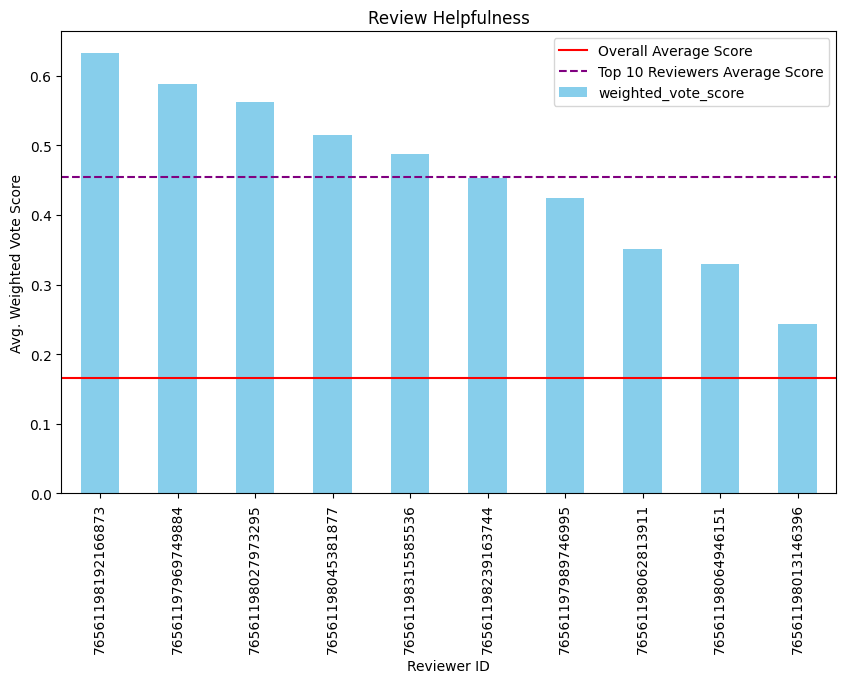

In [21]:
# Average weighted vote score calculation
top_reviewers_fb = rq5[rq5['author.steamid'].isin(top_reviewers.index)]

avg_score_overall = round(rq5['weighted_vote_score'].mean(),3)
avg_score_top_all = round(top_reviewers_fb['weighted_vote_score'].mean(),3)
avg_score_top = top_reviewers_fb.groupby(['author.steamid'])['weighted_vote_score'].mean().round(3).sort_values(ascending=False)

print('Overall average weighted vote score in the whole dataset:', avg_score_overall)
print('Average weighted vote score among the top 10 reviewers:', avg_score_top_all)
print('Average weigthed vote score for each of the top 10 reviewers:', *avg_score_top)

# Bar plot for the top 10 reviewers based on helpfulness of their reviews
plt.figure(figsize=(10, 6))
avg_score_top.plot(kind='bar', color='skyblue')

plt.axhline(y=avg_score_overall, color='red', linestyle='-', linewidth=1.5, label='Overall Average Score')
plt.axhline(y=avg_score_top_all, color='purple', linestyle='--', linewidth=1.5, label='Top 10 Reviewers Average Score')

plt.xlabel('Reviewer ID')
plt.ylabel('Avg. Weighted Vote Score')
plt.title('Review Helpfulness')
plt.legend()

plt.show()

As denoted by the red line, all of the top 10 reviewers have an average weighted vote score for their reviews above the dataset overall mean. This is due to the fact that the majority of the reviews have no votes at all. If we consider the purple line at 0.454 denoting the the mean between the top 10 reviewers we could set it as threshold with the more helpful reviewers above this line and the ones that are more likely to spam below it.

#### Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [22]:
# Create a new column with the count of the number of times each app was reviewed by the top 10 reviewers
top_reviewers_df['app_count'] = top_reviewers_df.groupby('app_id')['app_id'].transform('count')
top_reviewers_app_df = top_reviewers_df.drop_duplicates(subset='app_id')

# Calculate the overall number of unique apps reviewed by the top 10 reviewers
num_top_rev_apps = top_reviewers_app_df['app_id'].count()

# Sort the df based on the app_count in descending order
top_reviewers_app_df_sorted = top_reviewers_app_df.sort_values(by='app_count', ascending=False)
#top_rev_app_ids = np.array(top_reviewers_app_df['app_id'])

print('Altogether the top 10 reviewers reviewed:',num_top_rev_apps,'apps.')

Altogether the top 10 reviewers reviewed: 264 apps.


C:\Users\Paolo\AppData\Local\Temp\ipykernel_18672\1679042925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_reviewers_df['app_count'] = top_reviewers_df.groupby('app_id')['app_id'].transform('count')


In [23]:
top_reviewers_app_df = top_reviewers_app_df.sort_values(by='app_count', ascending=False)

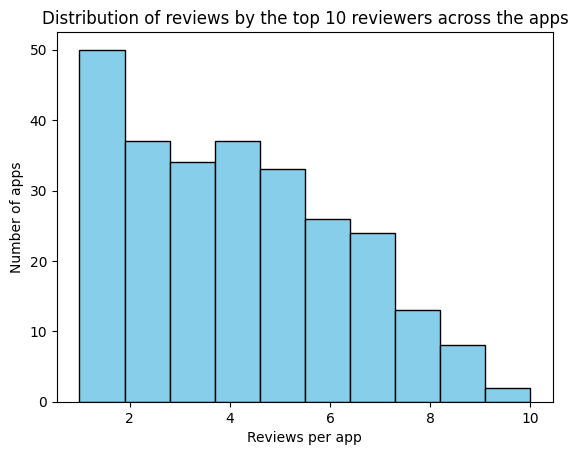

In [26]:
# Histogram of the distribution of reviews across the apps 
plt.hist(top_reviewers_app_df['app_count'], bins=10, color="skyblue", edgecolor="black")

plt.title('Distribution of reviews by the top 10 reviewers across the apps')
plt.xlabel('Reviews per app')
plt.ylabel('Number of apps')

plt.show()

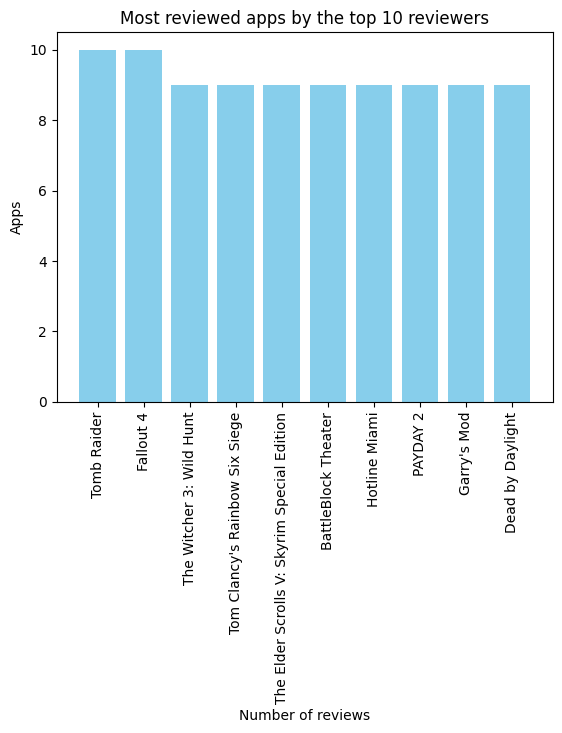

In [29]:
# Bar plot of the 10 most reviewed apps.
top_rev_apps = top_reviewers_app_df.head(10)
plt.bar(top_rev_apps['app_name'], top_rev_apps['app_count'], color='skyblue')

plt.xlabel('Number of reviews')
plt.ylabel('Apps')
plt.xticks(rotation=90)
plt.title('Most reviewed apps by the top 10 reviewers')


plt.plot()
plt.show()

Remove data to free up memory.

In [30]:
del rq5_l

In [31]:
del rq5

In [32]:
del top_reviewers_df

In [33]:
del top_rev_lang_count

In [34]:
del top_reviewers_fb

In [35]:
del top_reviewers_app_df

## [RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers

In [3]:
rq6_l = []
usec = ['app_id','review_id','author.steamid', 'timestamp_created','timestamp_updated', 'author.num_games_owned','language']
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=usec):
    review_chunk = chunk.fillna(value=0)
    rq6_l.append(review_chunk)

rq6 = pd.concat(rq6_l, ignore_index=True)
# Create the is_updated column 
rq6['is_updated'] = np.where(rq6['timestamp_created'] != rq6['timestamp_updated'], True, False)

print(rq6.shape)
rq6.head()

(21747371, 8)


,app_id,review_id,language,timestamp_created,timestamp_updated,author.steamid,author.num_games_owned,is_updated
0,292030,85185598,schinese,1611381629,1611381629,76561199095369542,6,False
1,292030,85185250,schinese,1611381030,1611381030,76561198949504115,30,False
2,292030,85185111,schinese,1611380800,1611380800,76561199090098988,5,False
3,292030,85184605,english,1611379970,1611379970,76561199054755373,5,False
4,292030,85184287,schinese,1611379427,1611379427,76561199028326951,7,False


In [4]:
rq6 = rq6.drop_duplicates()

In [5]:
rq6_1 = rq6.loc[(rq6['language'] == 'english') | (rq6['language'] == 'spanish')]
rq6_1.head()

,app_id,review_id,language,timestamp_created,timestamp_updated,author.steamid,author.num_games_owned,is_updated
3,292030,85184605,english,1611379970,1611379970,76561199054755373,5,False
5,292030,85184171,english,1611379264,1611379264,76561198170193529,11,False
6,292030,85184064,english,1611379091,1611379091,76561198119302812,27,False
9,292030,85182785,spanish,1611377005,1611377005,76561198301724112,38,False
18,292030,85180436,english,1611373086,1611373086,76561198065591528,33,False


The english group is more likely to updated reviews after submitting.

In [6]:
# Group by 'language' and 'is_updated', then count occurrences
update_counts = rq6_1.groupby(['language', 'is_updated']).size().unstack(fill_value=0)
update_counts.rename(columns={True: 'true'}, inplace=True)
update_counts.rename(columns={False: 'false'}, inplace=True)
update_counts['total'] = update_counts['true']+update_counts['false']
update_counts['true_perc'] = round(update_counts['true']/update_counts['total'],2)
update_counts['false_perc'] = round(update_counts['false']/update_counts['total'],2)
update_counts

is_updated,false,true,total,true_perc,false_perc
language,,,,,
english,8441234,1139434,9580668,0.12,0.88
spanish,724508,79853,804361,0.10,0.90


#### Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?

In [11]:
pd.options.display.float_format = '{:.2f}'.format
rq6_1['author.num_games_owned'].describe()

count        10385029.00
mean          1270659.43
std        2363831668.37
min                 0.00
25%                30.00
50%                81.00
75%               187.00
max     4398046511619.00
Name: author.num_games_owned, dtype: float64

In [13]:
rq6_1['author.num_games_owned'].sort_values(ascending=False)

5502449     4398046511619
8680945     4398046511170
6913009     4398046511151
17742447            22024
20632981            22023
                ...      
14698739                0
13643971                0
587884                  0
587722                  0
8554201                 0
Name: author.num_games_owned, Length: 10385029, dtype: int64

We use the interquartile range to remove outliers.

In [14]:
Q1 = rq6_1['author.num_games_owned'].quantile(0.25)
Q3 = rq6_1['author.num_games_owned'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
rq6_no_outliers = rq6_1[(rq6_1['author.num_games_owned'] >= lower_bound) & 
                    (rq6_1['author.num_games_owned'] <= upper_bound)]

In [17]:
rq6_eng = rq6_no_outliers[rq6_no_outliers['language']=='english'].groupby('author.steamid')['author.num_games_owned'].mean().reset_index()
rq6_spa = rq6_no_outliers[rq6_no_outliers['language']=='spanish'].groupby('author.steamid')['author.num_games_owned'].mean().reset_index()
avg_eng_games = round(rq6_eng['author.num_games_owned'].mean(),2)
avg_spa_games = round(rq6_spa['author.num_games_owned'].mean(),2)
print(f"The average number of games that reviewers from each group have on their Steam accounts is:\nEglish: {avg_eng_games} \nSpanish: {avg_spa_games}")


The average number of games that reviewers from each group have on their Steam accounts is:
Eglish: 84.53 
Spanish: 63.52


In [11]:
rq6_eng_2 = rq6_1[rq6_1['language']=='english'].groupby('author.steamid').app_id.count().reset_index()
rq6_spa_2 = rq6_1[rq6_1['language']=='spanish'].groupby('author.steamid').app_id.count().reset_index()
avg_eng_rev = round(rq6_eng_2['app_id'].mean(),2)
avg_spa_rev = round(rq6_spa_2['app_id'].mean(),2)
print(f"The average number of games that reviewers for which they write reviews is:\nEglish: {avg_eng_rev} \nSpanish: {avg_spa_rev}")


The average number of games that reviewers for which they write reviews is:
Eglish: 1.81 
Spanish: 1.63


In [20]:
del rq6

In [21]:
del rq6_1

In [ ]:
del rq6_no_outliers

## [RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.

In [15]:
rq7_l = []
usec = ['review_id','author.steamid', 'votes_helpful','recommended', 'author.num_games_owned','author.num_reviews']
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=usec):
    review_chunk = chunk.fillna(value=0)
    # Filter rows where 'review_id' is not in 'null_rev_ids'
    filtered_chunk = review_chunk[~review_chunk['review_id'].isin(null_rev_ids)]
    rq7_l.append(filtered_chunk)

rq7 = pd.concat(rq7_l, ignore_index=True)
print(rq7.shape)
rq7.head()

(21713623, 6)


,review_id,recommended,votes_helpful,author.steamid,author.num_games_owned,author.num_reviews
0,85185598,True,0,76561199095369542,6,2
1,85185250,True,0,76561198949504115,30,10
2,85185111,True,0,76561199090098988,5,1
3,85184605,True,0,76561199054755373,5,3
4,85184287,True,0,76561199028326951,7,4


In [16]:
rq7 = rq7.drop_duplicates()

#### What is the probability of submitting a review and receiving at least one helpful vote from other users?

To calculate the probability of submitting a review and receiving at least one helpful vote, we first determine the total number of reviews submitted. 
Next, we count the number of reviews that received at least one helpful vote and finally, we calculate the probability as the ratio of reviews with helpful votes to the total number of reviews.

In [26]:
# Total number of reviews submitted
total_reviews = rq7.shape[0]

# Number of reviews that received at least one helpful vote
reviews_with_helpful_votes = rq7[rq7['votes_helpful'] > 0].shape[0]

# Calculate probability
p_a = reviews_with_helpful_votes / total_reviews if total_reviews > 0 else 0

print(f"The probability of submitting a review and receiving at least one helpful vote is: {p_a:.2f}")


The probability of submitting a review and receiving at least one helpful vote is: 0.28


#### What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

To calculate the probability of submitting a review and receiving at least one helpful vote, given that you don’t recommend the app, we first filter the dataset to identify reviews that do not recommend the app. Next, we determine the total number of non-recommend reviews. Then, we count how many of these reviews received at least one helpful vote. Finally, we calculate the probability as the ratio of non-recommend reviews with helpful votes to the total number of non-recommend reviews.


In [21]:
# Filter the DataFrame for reviews that do not recommend the app
non_recommend_reviews = rq7[rq7['recommended'] == False]

# Total number of non-recommend reviews
total_non_recommend_reviews = non_recommend_reviews.shape[0]

# Number of non-recommend reviews that received at least one helpful vote
reviews_with_helpful_votes = non_recommend_reviews[non_recommend_reviews['votes_helpful'] > 0].shape[0]

# Calculate probability
probability = reviews_with_helpful_votes / total_non_recommend_reviews if total_non_recommend_reviews > 0 else 0

print(f"The probability of submitting a review and receiving at least one helpful vote, \ngiven that you don’t recommend the app, is: {probability:.2f}")


The probability of submitting a review and receiving at least one helpful vote, 
given that you don’t recommend the app, is: 0.48


#### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.

1. **Influence of Reviewer Experience:**
   - A reviewer who has submitted at least five reviews may have a more established presence in the community. This could lead to increased engagement and, potentially, more helpful votes for their reviews.
   - Conversely, a new reviewer or one with fewer reviews might not receive as many helpful votes due to a lack of trust or recognition from the community.

2. **Statistical Dependence:**
   - If reviewers with more experience (i.e., five or more reviews) tend to receive more helpful votes, then the two events are likely not independent. In this case, knowing that a reviewer has submitted at least five reviews could increase the likelihood of their current review receiving a helpful vote.
   - On the other hand, if the helpful votes are based purely on the content of the review and the app rather than the reviewer's history, there might be less correlation between the two events.


To empirically assess whether these events are independent, we can:

1. **Calculate Probabilities:**
   - Calculate $P(A)$ – the probability of receiving at least one helpful vote.
   - Calculate $P(B)$ – the probability of having submitted at least five reviews.
   - Calculate $P(A \cap B)$ – the probability of both receiving at least one helpful vote and having submitted at least five reviews.

2. **Check Independence:**
   - Compare $P(A \cap B)$ with $P(A) \times P(B)$:
     - If they are equal, the events are independent.
     - If not, the events are dependent.

We already have $P(A)$ so we will concentrate on calculating $P(B)$.

To calculate $P(B)$ - the probability of having submitted at least five reviews, we first determine the total number of unique reviewers in the dataset. Next, we count how many reviewers have submitted at least five reviews. Finally, we calculate the probability as the ratio of reviewers with at least five reviews to the total number of unique reviewers. In this way we are considering number of reviews in the dataset but we can also consider the column 'author.num_reviews' to see if something changes.


In [23]:
# Calculate P(B): Probability of having submitted at least five reviews
total_reviewers = rq7['author.steamid'].nunique()
reviewer_counts = rq7['author.steamid'].value_counts()
reviewers_with_five_or_more = reviewer_counts[reviewer_counts >= 5].index
p_b = len(reviewers_with_five_or_more) / total_reviewers if total_reviewers > 0 else 0

print(f"The probability of having submitted at least five reviews is: {p_b:.2f}")


The probability of having submitted at least five reviews is: 0.05


To calculate $P(A \cap B)$ — the probability of both receiving at least one helpful vote and having submitted at least five reviews — we filter for reviews that satisfy both conditions:

1. **Event A**: Reviews that have received at least one helpful vote.
2. **Event B**: Reviews submitted by authors who have at least five reviews.

Using this, we determine the number of reviews meeting both criteria, then divide by the total number of reviews to calculate $P(A \cap B)$.


In [25]:
# Calculate P(A ∩ B): Probability of both receiving at least one helpful vote and having submitted at least five reviews
reviews_a_and_b = rq7[(rq7['votes_helpful'] > 0) & (rq7['author.steamid'].isin(reviewers_with_five_or_more))].shape[0]
p_a_and_b = reviews_a_and_b / total_reviews if total_reviews > 0 else 0
print(f"The probability of both receiving at least one helpful vote \nand having submitted at least five reviews is: {p_a_and_b:.2f}.")

The probability of both receiving at least one helpful vote 
and having submitted at least five reviews is: 0.08.


To evaluate the independence of events, we compare $ P(A \cap B) $ with $ P(A) \times P(B) $. 
If $ P(A \cap B) = P(A) \times P(B) $, then the events are independent. Otherwise, they are dependent.


In [27]:
# Compare P(A ∩ B) with P(A) * P(B)
print(f"P(A): {p_a:.2f}, P(B): {p_b:.2f}, P(A ∩ B): {p_a_and_b:.2f}")
print("Conclusion: Events are independent" if p_a_and_b == p_a * p_b else "Conclusion: Events are dependent")

P(A): 0.28, P(B): 0.05, P(A ∩ B): 0.08
Conclusion: Events are dependent


Now we calculate instead the probability of having submitted at least five reviews, $ P(B2) $, using the number of reviews recorded by each unique reviewer in the **author.num_reviews** column. First, we determine the total number of unique reviewers in the dataset. Next, we filter for reviewers who have submitted five or more reviews and count how many meet this criterion. Finally, we compute $ P(B2) $ as the ratio of reviewers with five or more reviews to the total number of unique reviewers. 

In [30]:
rq7['author.num_reviews'].sort_values(ascending=False)

13071260    4398046511108
5653837     4398046511105
8053031              5236
20725275             5236
7826185              5236
                ...      
4746872                 1
4746873                 1
4746875                 1
4746878                 1
4746881                 1
Name: author.num_reviews, Length: 21578868, dtype: int64

In [ ]:
rq7.drop(index=[13071260, 5653837], inplace=True) #We remove the outliers.

In [32]:
# Calculate P(B2): Probability of having submitted at least five reviews according to 'author.num_reviews'
total_reviewers_2 = rq7['author.steamid'].nunique()
reviewers_with_five_or_more_2 = rq7[rq7['author.num_reviews'] >= 5]['author.steamid'].nunique()
p_b_2 = reviewers_with_five_or_more_2 / total_reviewers_2 if total_reviewers_2 > 0 else 0

print(f"The probability of having submitted at least five reviews is: {p_b_2:.2f}")


The probability of having submitted at least five reviews is: 0.22


In [33]:
# Calculate P(A ∩ B2): Probability of both receiving at least one helpful vote and having submitted at least five reviews
reviews_a_and_b_2 = rq7[(rq7['votes_helpful'] > 0) & (rq7['author.num_reviews'] >= 5)].shape[0]
p_a_and_b_2 = reviews_a_and_b_2 / total_reviews if total_reviews > 0 else 0

print(f"The probability of both receiving at least one helpful vote \nand having submitted at least five reviews is: {p_a_and_b_2:.2f}.")


The probability of both receiving at least one helpful vote 
and having submitted at least five reviews is: 0.16.


In [34]:
# Compare P(A ∩ B2) with P(A) * P(B2)
print(f"P(A): {p_a:.2f}, P(B): {p_b_2:.2f}, P(A ∩ B): {p_a_and_b_2:.2f}")
print("Conclusion: Events are independent" if p_a_and_b_2 == p_a * p_b_2 else "Conclusion: Events are dependent")

P(A): 0.28, P(B): 0.22, P(A ∩ B): 0.16
Conclusion: Events are dependent


The conclusion is that also considering values according to **author.num_reviews** we can state that the 2 events are dependent.

#### We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.

In [38]:
pd.options.display.float_format = '{:.2f}'.format
rq7['author.num_games_owned'].describe()

count        21578866.00
mean          1019196.15
std        2117046858.38
min                 0.00
25%                22.00
50%                61.00
75%               146.00
max     4398046511619.00
Name: author.num_games_owned, dtype: float64

In [39]:
# Calculate Q1 and Q3
Q1 = rq7['author.num_games_owned'].quantile(0.25)
Q3 = rq7['author.num_games_owned'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
rq7_filtered = rq7[(rq7['author.num_games_owned'] >= lower_bound) & (rq7['author.num_games_owned'] <= upper_bound)]

# Display the shape of the original and filtered DataFrame
print(f"Original shape: {rq7.shape}")
print(f"Filtered shape: {rq7_filtered.shape}")


Original shape: (21578866, 6)
Filtered shape: (19719887, 6)


In [45]:
import scipy.stats as stats

# Extract relevant columns
games_owned = rq7_filtered['author.num_games_owned']
num_reviews = rq7_filtered['author.num_reviews']

# Calculate correlation coefficient
correlation, p_value = stats.pearsonr(games_owned, num_reviews)

# Print results
print(f"Correlation coefficient between number of games owned and number of reviews submitted: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if correlation < 0 and p_value < 0.05:
    print("There is a significant negative correlation, supporting the hypothesis.")
elif correlation > 0 and p_value < 0.05:
    print("There is a significant positive correlation, which refutes the hypothesis.")
else:
    print("There is no significant correlation, suggesting no strong relationship.")


Correlation coefficient between number of games owned and number of reviews submitted: 0.38
P-value: 0.0000
There is a significant positive correlation, which refutes the hypothesis.


In [46]:
del rq7

In [47]:
del non_recommend_reviews

In [48]:
del rq7_filtered

In [49]:
del games_owned

In [50]:
del num_reviews

#### Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

Histograms, bar plots, scatterplots, and pie charts serve distinct purposes in data visualization and statistical analysis. Histograms are used to represent the distribution of continuous numerical data, allowing us to see patterns, skewness, and the spread of values. Bar plots compare categorical data, showing the frequency or proportion of each category, which helps in identifying trends and differences among groups. Scatterplots visualize the relationship between two continuous variables, revealing correlations, clusters, and potential outliers. Pie charts represent parts of a whole, effectively illustrating the composition of categorical data, though they can be less effective for comparing sizes.

To enhance the trustworthiness of the insights derived from these visualizations, it is crucial to ensure the data is clean, representative, and appropriately sampled. Using larger datasets can provide more reliable insights and reduce the influence of outliers. Additionally, complementing visual analysis with statistical tests can help confirm findings, providing a more robust basis for conclusions drawn from the visualizations.

## Bonus

Beyond just looking at the numerical ratings, the words users write in their reviews give us valuable insights into how they feel about the application. Let's analyze these review texts using sentiment analysis.

In [4]:
bonus = []

# Read the CSV in chunks and append to the list
for chunk in pd.read_csv(filename, chunksize=chunksize, header='infer', usecols=['review_id', 'review', 'recommended', 'language', 'votes_helpful']):
    # Drop rows with any null values in the current chunk
    chunk = chunk.dropna()
    # Append the cleaned chunk to the list
    bonus.append(chunk)

# Concatenate all cleaned chunks into a single DataFrame
reviews = pd.concat(bonus, ignore_index=True)

# Display the shape of the DataFrame after filtering
print("Shape after filtering:", reviews.shape)

# Display the first few rows of the cleaned DataFrame
reviews.head()


Shape after filtering: (21713623, 5)


,review_id,language,review,recommended,votes_helpful
0,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,True,0
1,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,True,0
2,85185111,schinese,巫师3NB,True,0
3,85184605,english,"One of the best RPG's of all time, worthy of a...",True,0
4,85184287,schinese,大作,True,0


In [5]:
reviews = reviews.drop_duplicates()
reviews.shape

(21578868, 5)

In [ ]:
from textblob import TextBlob

# Filter the top 3 languages for sentiment analysis
top_languages = reviews['language'].value_counts().nlargest(3).index
reviews_top_lang = reviews[reviews['language'].isin(top_languages)]

# Perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis on the review texts
reviews_top_lang['sentiment'] = reviews_top_lang['review'].apply(get_sentiment)

# Analyze sentiment distribution across all reviews
sentiment_distribution = reviews_top_lang['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution:\n", sentiment_distribution)

In [ ]:
# Compare sentiment with recommendations
sentiment_recommendation = pd.crosstab(reviews_top_lang['sentiment'], reviews_top_lang['recommended'], normalize='index') * 100
print("\nSentiment vs Recommendation:\n", sentiment_recommendation)

# Check correlation between sentiment and helpful votes
helpful_sentiment = reviews_top_lang.groupby('sentiment')['votes_helpful'].mean()
print("\nAverage Helpful Votes by Sentiment:\n", helpful_sentiment)

# Plot the results (optional)
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', title='Sentiment Distribution')
plt.ylabel('Percentage')
plt.show()

# Plot sentiment vs. recommendation
sentiment_recommendation.plot(kind='bar', stacked=True, title='Sentiment vs Recommendation')
plt.ylabel('Percentage')
plt.show()

# Plot average helpful votes by sentiment
helpful_sentiment.plot(kind='bar', title='Average Helpful Votes by Sentiment')
plt.ylabel('Average Helpful Votes')
plt.show()


#### Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.

#### What is the distribution of sentiment across all reviews?

#### Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.

#### Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.

## Algorithmic Question (AQ)

### ALGORITHMIC QUESTION

##### Input
Following is the function that takes as an input two positive integers, n and k. 
The objective is to obtain an array A of k positive integers of the same parity that sum up to n.
The function returns 'yes' when this is possible alongside the array A and 'no' otherwise.

##### Overall idea
The solution is based on some observed patterns that make it always impossible to get the desired array. By going through these conditions we can verify if it is possible to create array A or no.

Note: k-'bins' refer to k positive integer, make for an easier visualization

##### Solution
The problem was divided into two parts:

Initial consideration:
Firstly, few conditions were applied
    - both need to be non-zero positive integer
    - we cannot split n into k integers if k>n
    
1. Generate the array A
    The main idea was to divide n directly by k, obtaining this way the fixed number of k-'bins' all of the same parity, where we could potentionally accomodate the remainder.

2. Verification whether it's possible for all the k-'bins' to be of the same parity
    The solution is based on some observed patterns that make it always impossible or always possible to get the desired array. I focused on analyzing the parities of the input integers as well as those of the remainders after n by k division.

    Parity of n,k :
    - If both are even or both are odd we can obtain array A. => remainder is going to be even and so it can be easily added to one of the k-'bins' without changing the parity of that number.
    - If n is odd and k even it is impossible to split n into k-'bins' of the same parity.
    - For n even and k odd we took into account 2 conditions:
        If after the floor division (ensuring the overall some won't be superior to n) the remainder it's even we can add it to one of the numbers as previously done. 
        In case the remainder is odd, we can try to take 1 from every k-'bin' and adding it to the remainder. This would change the parity of the numbers as well as the remainder which would become even. This is only applicable for k smaller than n/2, because otherwise we would be summing 0. For k bigger than n/2 we return no. 





In [15]:
import math
import time

def aq1(n, k): 

    start_time = time.time()
    try:
        remainder = n%k
    except ZeroDivisionError:
        return print('Division by zero. Try different number.')
        
    if n < 0 or k < 0:
        print('NO')

    elif k>n:
        print('NO')

    elif remainder%2 == 0:                               # for numbers with even remainder we can always easily add the remainder to the last number without changing the parity
        divided_part = (n-remainder)//k                 # the closest number divisible by k is obtained
        arr = [divided_part for i in range(k)]          # list of the obtained values is formed and succesively the remainder is added to the last digit
        arr[-1] += remainder
        print('YES')
        print(*(arr))


    elif (n%2 == 1) and (k%2 == 0):                     # it's not possible to divide an odd number into even parts, so if n is odd and k even we can return NO
        print('NO')

    else:
        divided_part = math.floor(n/(k))
        if divided_part-1 == 0: 
            print('NO')
        else:                                           # floor function used to ensure the final sum won't be more than n 
            arr = [divided_part-1 for i in range(k)]    # we rest one to each of the parts to change the overall parity 
            remainder = n-sum(arr)

            if remainder%2 == 0:
                arr[-1] += remainder
                print('YES')
                print(*arr)

            elif divided_part-1 == 0:
                print('NO')
            else:             
                print('It seems I missed some cases...?')

In [17]:
# code to test the AQ1
if __name__ == '__main__':
    t = int(input())
    for i in range(t):
        test_case = list(map(int, input().split()))
        aq1(test_case[0], test_case[1])

YES
2 2 6
YES
25 25 25 25
NO
NO
YES
1 1 1 1 1 1 1 1
YES
1 1 1 1 1 1 1 1
NO
YES
1 1 3


### Time Complexity Analysis

#### My evaluation:
As the code consists only of the series of conditition, we need to consider the value assignment, condition verification and print statments, all of value of 1. The most complex part is the list generation (if the number n is able to be split into k-bins) in range of the second integer k, which would be done only once at most. Altogether, this would indicate the time complexity is k at its worst case. Hence the big-O notation would be that of a constant: O(k).


#### ChatGTP response:
---

##### Time Complexity Evaluation of the Function `aq1(n, k)`

**1. Remainder Calculation:**
   - The operation to compute the remainder (`n % k`) is performed in constant time.
   - **Complexity:** \( O(1) \)

**2. Initial Checks for Negative Values or Zero Division:**
   - The function checks if either `n` or `k` is negative and verifies if `k` is greater than `n`. Each condition involves simple comparisons and print statements.
   - **Complexity:** \( O(1) \)

**3. Case: Even Remainder (`remainder % 2 == 0`):**
   - In this case, the function calculates the `divided_part`, creates a list `arr` of size \( k \), and modifies the last element.
   - The sum of the elements in `arr` is computed as well.
   - **Total Complexity for This Block:** \( O(k) \)

**4. Case: Odd `n` and Even `k` (`n % 2 == 1` and `k % 2 == 0`):**
   - This branch directly prints a message and does not involve any computations dependent on \( k \).
   - **Complexity:** \( O(1) \)

**5. Other Cases (Handling Odd Remainder):**
   - If none of the previous conditions are met, the function calculates the `divided_part`, initializes a list `arr` of size \( k \), and computes the sum of its elements.
   - If the remainder is even, the function modifies `arr` again and performs similar printing operations.
   - **Total Complexity for This Block:** \( O(k) \)

**6. Final Conditional Checks:**
   - The function includes additional checks with simple print statements.
   - **Complexity:** \( O(1) \)

##### Overall Time Complexity

The highest complexity arises from operations involving lists of size \( k \). As such, the overall time complexity of the function `aq1(n, k)` is:

**Final Complexity:** \( O(k) \)

--- 

#### Final thoughts:
There seem to be no major differences in the evaluation processes of the time complexity. ChatGTP correctly takes into account all of the code blocks, differentiating between the simple operations of cost 1 and those of array building of cost k, and followingly lands on the same conclusion, that is the time complexity is dependent on the input integer k. 
